In [1]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

In [146]:
# Execute this cell to reset the plots and reload graphing code
%run analysis_tools_training.py
%run analysis_tools_AD.py
%matplotlib inline 

# First experiments

CE -> Setting up -> Training with preprocessing and random  mask

peak train_loss: 0.0044 in epoch: 86
peak val_loss: 0.0031 in epoch: 82


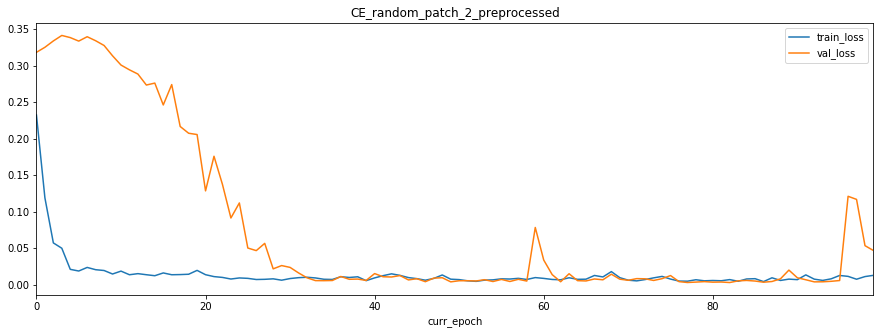

In [3]:
experiment_name = "CE_random_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["loss"], logy=False, n = 1)

In [ ]:
experiment_name = "CE_central_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up -> DTD

peak train_loss: 0.0854 in epoch: 95
peak val_loss: 0.0807 in epoch: 94


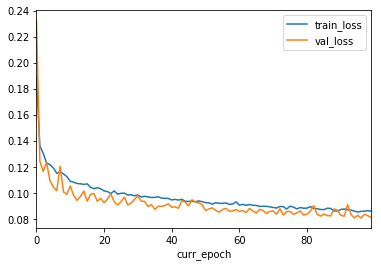

In [37]:
experiment_name = "CE_DTD_random_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

Min train_loss: 0.0192 in epoch: 92
Min val_loss: 0.1104 in epoch: 97


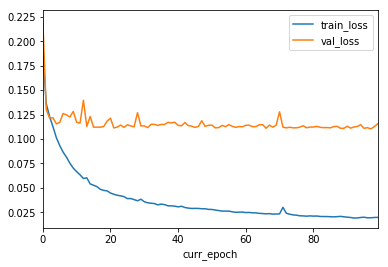

In [15]:
experiment_name = "CE_DTD_central_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

Min train_loss: 0.0179 in epoch: 98
Min val_loss: 0.1006 in epoch: 98


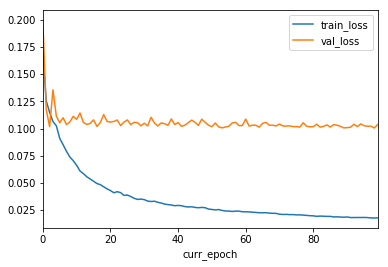

In [16]:
experiment_name = "CE_DTD_resize_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up ->Mias resize

Min train_loss: 0.0040 in epoch: 83
Min val_loss: 0.0203 in epoch: 93


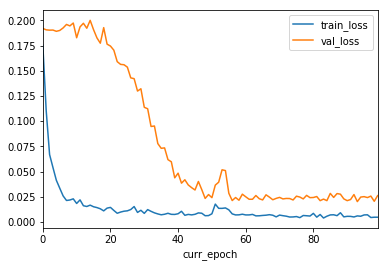

In [17]:
experiment_name = "CE_Mias_resize_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

# r2: improvements in anomaly detection
## Training results
experiments -> CE -> improvements for anomaly detection

peak train_loss: 0.0866 in epoch: 199
peak val_loss: 0.0836 in epoch: 196


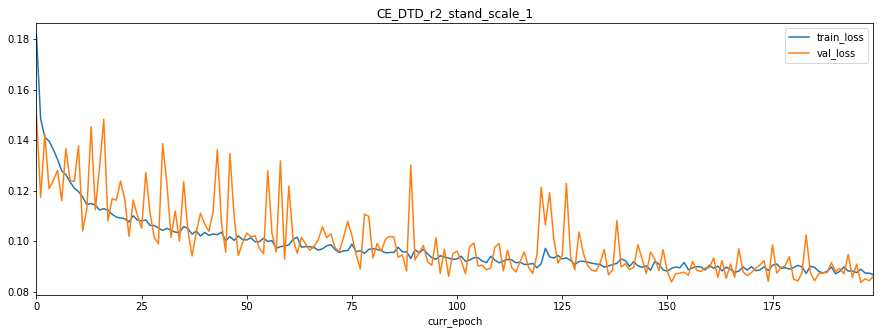

------------------------------------------------------------------
peak train_loss: 0.1066 in epoch: 198
peak val_loss: 0.1060 in epoch: 196


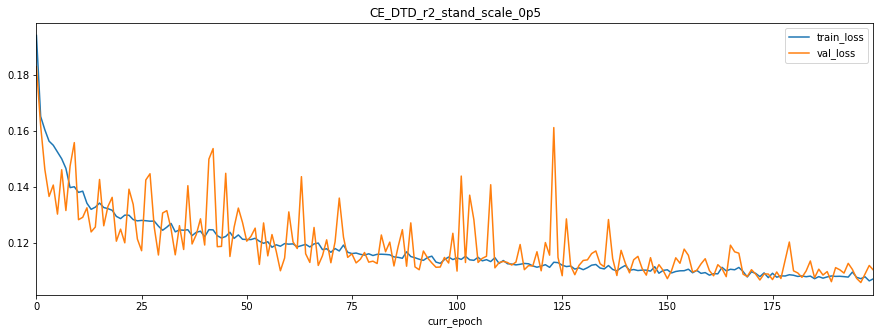

------------------------------------------------------------------
peak train_loss: 0.0596 in epoch: 190
peak val_loss: 0.0580 in epoch: 195


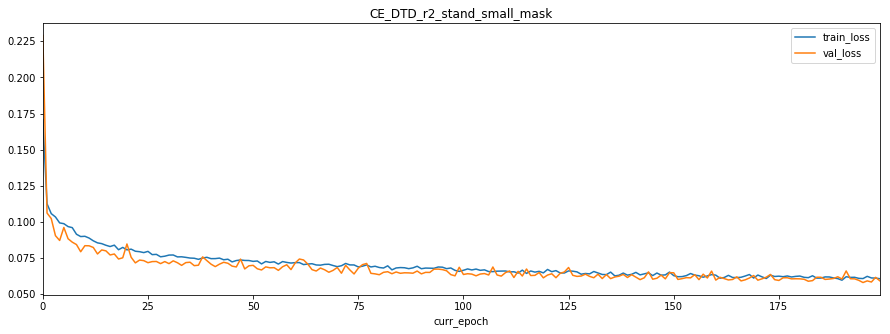

------------------------------------------------------------------
peak train_loss: 0.0888 in epoch: 189
peak val_loss: 0.0901 in epoch: 177


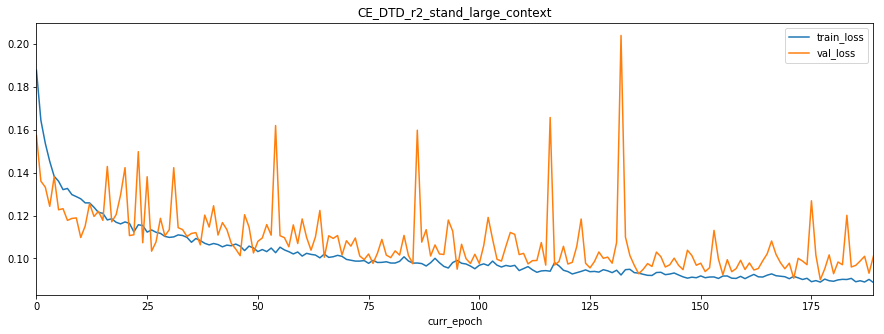

------------------------------------------------------------------
peak train_loss: 4.5766 in epoch: 197
peak val_loss: 4.5526 in epoch: 196
peak train_map_mse_range11: 0.1769 in epoch: 194
peak val_map_mse_range11: 0.1567 in epoch: 173


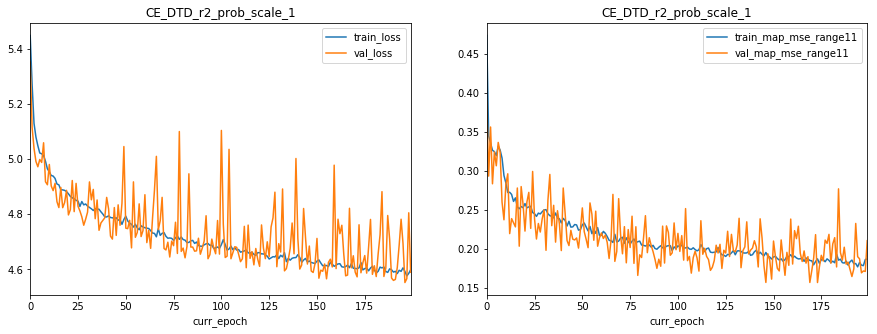

------------------------------------------------------------------
peak train_loss: 4.7002 in epoch: 197
peak val_loss: 4.6904 in epoch: 196
peak train_map_mse_range11: 0.2298 in epoch: 197
peak val_map_mse_range11: 0.1928 in epoch: 182


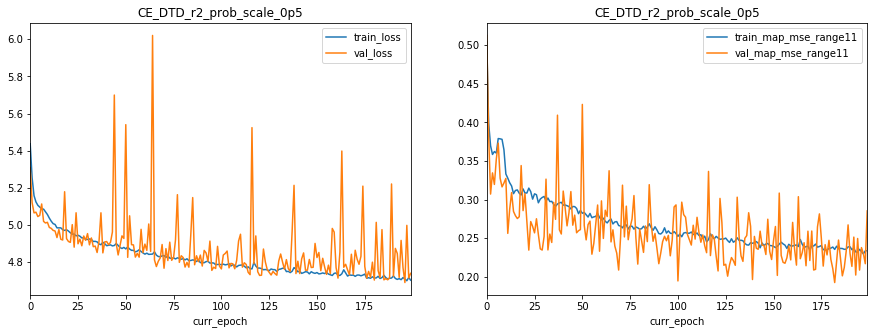

------------------------------------------------------------------
peak train_loss: 4.4139 in epoch: 195
peak val_loss: 4.3939 in epoch: 196
peak train_map_mse_range11: 0.1351 in epoch: 185
peak val_map_mse_range11: 0.1181 in epoch: 128


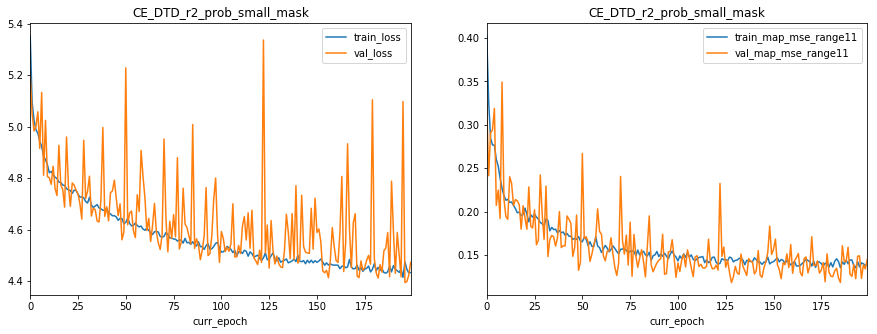

------------------------------------------------------------------
peak train_loss: 4.6391 in epoch: 159
peak val_loss: 4.6096 in epoch: 144
peak train_map_mse_range11: 0.1974 in epoch: 157
peak val_map_mse_range11: 0.1574 in epoch: 138


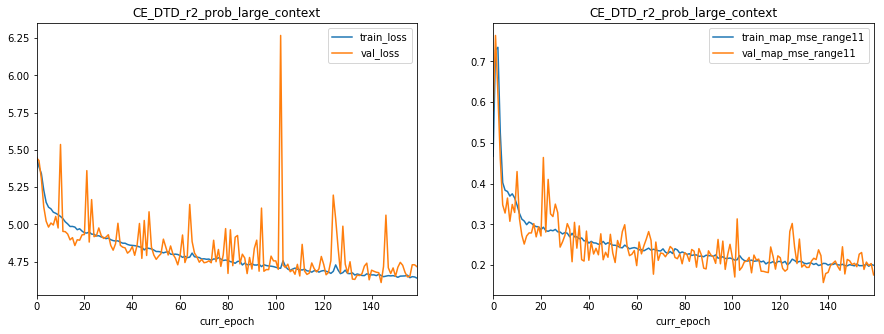

------------------------------------------------------------------


In [113]:
# just show all experiments
experiment_names = [
"CE_DTD_r2_stand_scale_1",
"CE_DTD_r2_stand_scale_0p5",
"CE_DTD_r2_stand_small_mask",
"CE_DTD_r2_stand_large_context",
"CE_DTD_r2_prob_scale_1",
"CE_DTD_r2_prob_scale_0p5",
"CE_DTD_r2_prob_small_mask",
"CE_DTD_r2_prob_large_context"]

ns = [1]*8

variables_to_show = [["all"]]*4 + [["loss","map_mse_range11"]]*4

show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

Conclusions:
* everything is learning
* 200 epochs is still not enough, but I might just keep it like this for this experiment
* It's obviously easier to predict the content of the small mask, so the losses are the smallest there (talking about MSE here, so that's not small from smaller size alone, but from smaller size making prediction easier)
    * CE-loss for the small mask is also smaller than the others, but I think that is not as relevant, because NLL should be smaller automatically for a smaller patch
* MAP_MSE of the probabilistic model is worse than MSE of the deterministic model, but not drastically so. I think I kind of expected that, since mode of prediction (which is used for MAP) and mean (which is the value that minimizes MSE) are different.


### compare the standard experiment from this round to last round

peak train_loss: 0.0854 in epoch: 95
peak val_loss: 0.0807 in epoch: 94


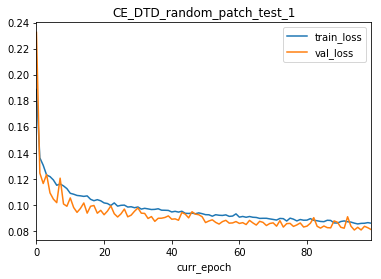

In [70]:
# last round
experiment_name = "CE_DTD_random_patch_test_1"
n = 1

show_traces(experiment_name = experiment_name, n=n, variables_to_show = "all", logy=False)

peak train_loss: 0.0866 in epoch: 199
peak val_loss: 0.0836 in epoch: 196


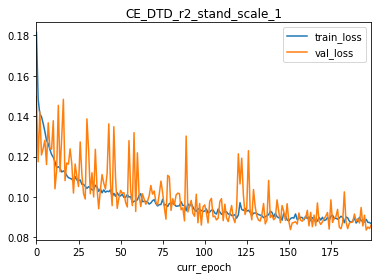

In [71]:
# this round
experiment_name = "CE_DTD_r2_stand_scale_1"
n = 1

show_traces(experiment_name = experiment_name, n=n, variables_to_show = "all", logy=False)


I don't know where this difference comes from. The only changes that happened between those two experiments are:
* the second one is with a fixed val set
* the second one is longer (obviously)

I checked the configs again, and these were indeed the same experiment. Probably caused by random seed? I won't investigate further right now, doesn't seem crucial for my question. Especially since the images look pretty similar (see "final_report word file")

## anomaly detection
(experiments -> context encoder -> improvements for anomaly detection: anomaly detection)

In [48]:
experiment_names = ['CE_DTD_r2_stand_scale_1___AD_window_mean',
'CE_DTD_r2_stand_scale_1___AD_window_min',
'CE_DTD_r2_stand_scale_1___AD_window_max',
'CE_DTD_r2_stand_scale_0p5___AD_window_mean',
'CE_DTD_r2_stand_scale_0p5___AD_window_min',
'CE_DTD_r2_stand_scale_0p5___AD_window_max',
'CE_DTD_r2_stand_small_mask___AD_window_mean',
'CE_DTD_r2_stand_small_mask___AD_window_min',
'CE_DTD_r2_stand_small_mask___AD_window_max',
'CE_DTD_r2_stand_large_context___AD_window_mean',
'CE_DTD_r2_stand_large_context___AD_window_min',
'CE_DTD_r2_stand_large_context___AD_window_max',
'CE_DTD_r2_prob_scale_1___AD_window_mean',
'CE_DTD_r2_prob_scale_1___AD_window_min',
'CE_DTD_r2_prob_scale_1___AD_window_max',
'CE_DTD_r2_prob_scale_0p5___AD_window_mean',
'CE_DTD_r2_prob_scale_0p5___AD_window_min',
'CE_DTD_r2_prob_scale_0p5___AD_window_max',
'CE_DTD_r2_prob_small_mask___AD_window_mean',
'CE_DTD_r2_prob_small_mask___AD_window_min',
'CE_DTD_r2_prob_small_mask___AD_window_max',
'CE_DTD_r2_prob_large_context___AD_window_mean',
'CE_DTD_r2_prob_large_context___AD_window_min',
'CE_DTD_r2_prob_large_context___AD_window_max']

features = "r2"
sort_column = "val_mean_aucroc"

df = summary_stats(experiment_names, features, sort_column)

val_mean_aucroc    val_sd  \
experiment_name                                                             
CE_DTD_r2_prob_small_mask___AD_window_min              0.623944  0.216293   
CE_DTD_r2_prob_scale_1___AD_window_min                 0.628898  0.215582   
CE_DTD_r2_stand_small_mask___AD_window_min             0.629687  0.168971   
CE_DTD_r2_stand_large_context___AD_window_min          0.635532  0.175034   
CE_DTD_r2_prob_large_context___AD_window_min           0.642368  0.212402   
CE_DTD_r2_stand_scale_1___AD_window_min                0.646119  0.171483   
CE_DTD_r2_prob_small_mask___AD_window_mean             0.670028  0.216194   
CE_DTD_r2_stand_scale_0p5___AD_window_min              0.671811  0.178473   
CE_DTD_r2_prob_scale_0p5___AD_window_min               0.676576  0.196200   
CE_DTD_r2_stand_small_mask___AD_window_mean            0.686113  0.207889   
CE_DTD_r2_prob_small_mask___AD_window_max              0.690585  0.205885   
CE_DTD_r2_stand_small_mask___AD_window_max             0.698130  0.219646   
CE_DTD_r2_stand_scale_0p5___AD_window_max              0.700664  0.207949   
CE_DTD_r2_stand_large_context___AD_window_mean         0.701716  0.196320   
CE_DTD_r2_stand_scale_0p5___AD_window_mean             0.705256  0.195604   
CE_DTD_r2_stand_scale_1___AD_window_mean               0.709514  0.203329   
CE_DTD_r2_prob_scale_1___AD_window_mean                0.712216  0.201477   
CE_DTD_r2_stand_large_context___AD_window_max          0.716233  0.213520   
CE_DTD_r2_stand_scale_1___AD_window_max                0.717834  0.221110   
CE_DTD_r2_prob_large_context___AD_window_mean          0.722764  0.200590   
CE_DTD_r2_prob_scale_1___AD_window_max                 0.740305  0.192312   
CE_DTD_r2_prob_scale_0p5___AD_window_mean              0.743302  0.181746   
CE_DTD_r2_prob_large_context___AD_window_max           0.749941  0.192030   
CE_DTD_r2_prob_scale_0p5___AD_window_max               0.751187  0.184084   

                                                 val_sem  test_mean_aucroc  \
experiment_name                                                              
CE_DTD_r2_prob_small_mask___AD_window_min       0.009977          0.642804   
CE_DTD_r2_prob_scale_1___AD_window_min          0.009944          0.646197   
CE_DTD_r2_stand_small_mask___AD_window_min      0.007794          0.645811   
CE_DTD_r2_stand_large_context___AD_window_min   0.008074          0.645831   
CE_DTD_r2_prob_large_context___AD_window_min    0.009797          0.657870   
CE_DTD_r2_stand_scale_1___AD_window_min         0.007910          0.651267   
CE_DTD_r2_prob_small_mask___AD_window_mean      0.009972          0.684147   
CE_DTD_r2_stand_scale_0p5___AD_window_min       0.008232          0.680834   
CE_DTD_r2_prob_scale_0p5___AD_window_min        0.009050          0.692005   
CE_DTD_r2_stand_small_mask___AD_window_mean     0.009589          0.688743   
CE_DTD_r2_prob_small_mask___AD_window_max       0.009497          0.698165   
CE_DTD_r2_stand_small_mask___AD_window_max      0.010132          0.698859   
CE_DTD_r2_stand_scale_0p5___AD_window_max       0.009592          0.711456   
CE_DTD_r2_stand_large_context___AD_window_mean  0.009056          0.708395   
CE_DTD_r2_stand_scale_0p5___AD_window_mean      0.009023          0.718651   
CE_DTD_r2_stand_scale_1___AD_window_mean        0.009379          0.713632   
CE_DTD_r2_prob_scale_1___AD_window_mean         0.009293          0.728728   
CE_DTD_r2_stand_large_context___AD_window_max   0.009849          0.725275   
CE_DTD_r2_stand_scale_1___AD_window_max         0.010199          0.724519   
CE_DTD_r2_prob_large_context___AD_window_mean   0.009253          0.735547   
CE_DTD_r2_prob_scale_1___AD_window_max          0.008871          0.751122   
CE_DTD_r2_prob_scale_0p5___AD_window_mean       0.008383          0.758681   
CE_DTD_r2_prob_large_context___AD_window_max    0.008858          0.757343   
CE_DTD_r2_prob_scale_0p5___AD_window_max        0.008491          0.763600   

                

### comparing window aggregation method
So that you can compare the effect of window aggregation method

Text(0, 0.5, 'val_mean_aucroc')

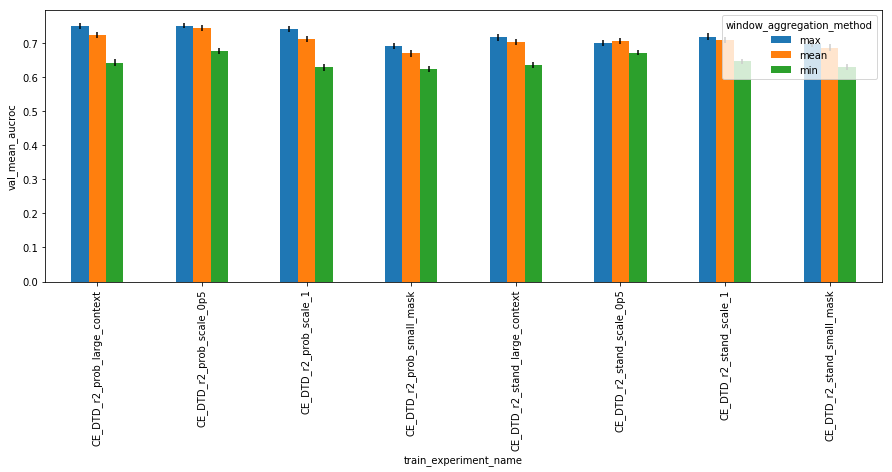

In [18]:
group = "train_experiment_name"
variable = "window_aggregation_method"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars



data_df = df.pivot(group, variable, y)
yerr_df = df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5))
ax.set_ylabel(y)

In [136]:
### This was my first way to create this plot. I tnow seems overly complicated, but I'll keep it around for a while just in case 
# experiment_names = ['CE_DTD_r2_stand_scale_1___AD_window_mean',
# 'CE_DTD_r2_stand_scale_1___AD_window_min',
# 'CE_DTD_r2_stand_scale_1___AD_window_max',
# 'CE_DTD_r2_stand_scale_0p5___AD_window_mean',
# 'CE_DTD_r2_stand_scale_0p5___AD_window_min',
# 'CE_DTD_r2_stand_scale_0p5___AD_window_max',
# 'CE_DTD_r2_stand_small_mask___AD_window_mean',
# 'CE_DTD_r2_stand_small_mask___AD_window_min',
# 'CE_DTD_r2_stand_small_mask___AD_window_max',
# 'CE_DTD_r2_stand_large_context___AD_window_mean',
# 'CE_DTD_r2_stand_large_context___AD_window_min',
# 'CE_DTD_r2_stand_large_context___AD_window_max',
# 'CE_DTD_r2_prob_scale_1___AD_window_mean',
# 'CE_DTD_r2_prob_scale_1___AD_window_min',
# 'CE_DTD_r2_prob_scale_1___AD_window_max',
# 'CE_DTD_r2_prob_scale_0p5___AD_window_mean',
# 'CE_DTD_r2_prob_scale_0p5___AD_window_min',
# 'CE_DTD_r2_prob_scale_0p5___AD_window_max',
# 'CE_DTD_r2_prob_small_mask___AD_window_mean',
# 'CE_DTD_r2_prob_small_mask___AD_window_min',
# 'CE_DTD_r2_prob_small_mask___AD_window_max',
# 'CE_DTD_r2_prob_large_context___AD_window_mean',
# 'CE_DTD_r2_prob_large_context___AD_window_min',
# 'CE_DTD_r2_prob_large_context___AD_window_max']

# bar_pattern = "val_mean_aucroc" # all column names that contain this string are plotted
# err_pattern = "val_sem" #  all column names that contain this string are error bars

# df = summary_stats_by_train_exp(experiment_names)

# # plotting
# y = [column for column in df.columns if bar_pattern in column]
# yerr = [column for column in df.columns if err_pattern in column]
# df.plot(kind="bar", y=y, yerr=df[yerr].values.T, figsize=(15,5))

Conclusions:
    * min always works works
    * max nearly always works best

So let's look at only mean and max, and check out patch and mask size

### checking out patch and mask size:

Text(0, 0.5, 'val_mean_aucroc')

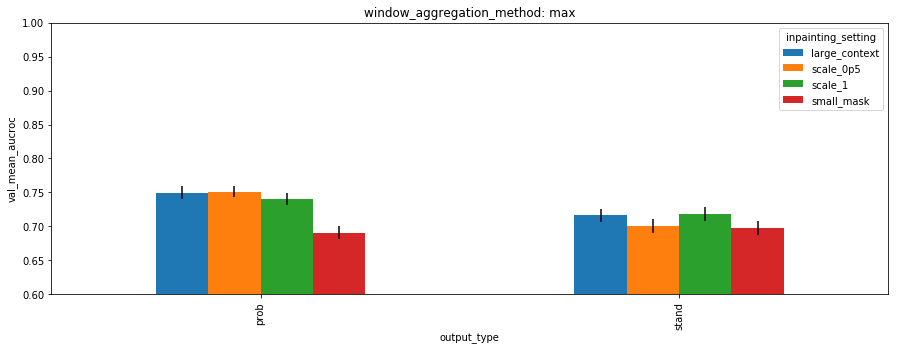

In [19]:
group = "output_type"
variable = "inpainting_setting"

filter_variable = "window_aggregation_method"
filter_value = "max"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Text(0, 0.5, 'val_mean_aucroc')

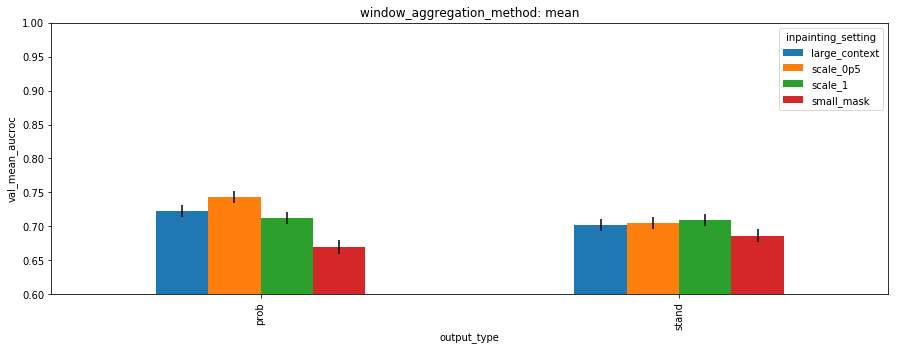

In [20]:
group = "output_type"
variable = "inpainting_setting"

filter_variable = "window_aggregation_method"
filter_value = "mean"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

In [21]:
# # old version. s.a.
# y = "AD_window_mean_val_mean_aucroc"
# yerr = "AD_window_mean_val_sem"

# df.plot(kind="bar", y=y, yerr=yerr, figsize=(15,5), ylim=[0.6,1])

conclusion: 
* Differences are small
* The small smask doesn't perform well


Let's look at probabilistic vs MSE

### probabilistic vs non-probabilistic

Text(0, 0.5, 'val_mean_aucroc')

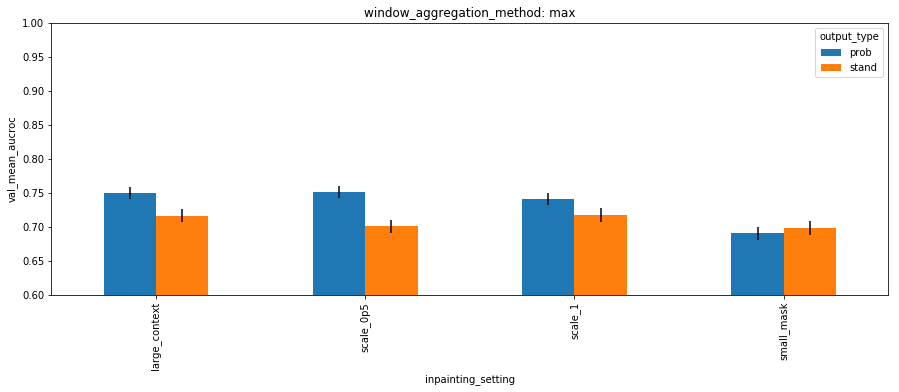

In [22]:
group = "inpainting_setting"
variable = "output_type"

filter_variable = "window_aggregation_method"
filter_value = "max"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Text(0, 0.5, 'val_mean_aucroc')

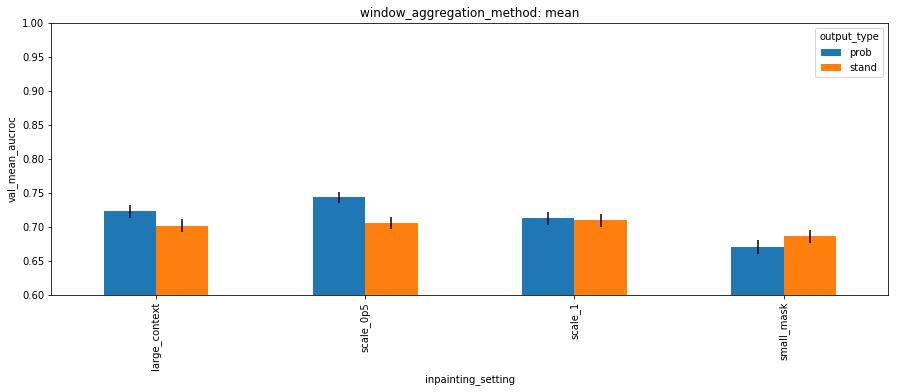

In [24]:
group = "inpainting_setting"
variable = "output_type"

filter_variable = "window_aggregation_method"
filter_value = "mean"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Conclusion:
* the probabilistic version does indeed work better, for both mean and max aggregation methods (expect for small_mask, which was the worst anyway)

## combining anomaly maps from several models

In [72]:
experiment_names =[
'CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sm_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sm_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sm_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Lc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Lc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Lc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Lc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Lc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Lc_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc05Sm_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc05Sm_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc05Sm_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc05Lc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc05Lc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc05Lc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc05Lc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc05Lc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc05Lc_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_SmLc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_SmLc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_SmLc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_max_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_mean_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_mean_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_mean_comb_max',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_max_comb_min',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_max_comb_mean',
'CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sm_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sm_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sm_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sm_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sm_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sm_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Lc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Lc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Lc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc05Sm_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc05Sm_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc05Sm_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc05Lc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc05Lc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc05Lc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc05Lc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc05Lc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc05Lc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_SmLc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_SmLc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_SmLc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_max_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_mean_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_mean_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_mean_comb_max',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_max_comb_min',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_max_comb_mean',
'CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_max_comb_max']


features = "r2_comb"
sort_column = "val_mean_aucroc"

df = summary_stats(experiment_names, features, sort_column)

val_mean_aucroc    val_sd  \
experiment_name                                                                 
CE_DTD_r2_prob___ADcomb_SmLc_win_mean_comb_min             0.675136  0.216449   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_mean_comb_min           0.679887  0.213959   
CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_mean_comb_min         0.682591  0.214532   
CE_DTD_r2_prob___ADcomb_Sc1Sm_win_mean_comb_min            0.688518  0.210761   
CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_mean_comb_min          0.689787  0.210290   
CE_DTD_r2_stand___ADcomb_SmLc_win_mean_comb_min            0.692990  0.204821   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_mean_comb...         0.693378  0.208842   
CE_DTD_r2_stand___ADcomb_Sc1Sm_win_mean_comb_min           0.694042  0.206063   
CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_mean_co...         0.694464  0.208773   
CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_min              0.695409  0.208082   
CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_mean_comb_min         0.696032  0.204151   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_min            0.697968  0.205453   
CE_DTD_r2_prob___ADcomb_Sc1Sm_win_mean_comb_max            0.698725  0.210858   
CE_DTD_r2_stand___ADcomb_Sc05Sm_win_mean_comb_min          0.699067  0.199299   
CE_DTD_r2_prob___ADcomb_Sc1Sm_win_mean_comb_mean           0.700385  0.215149   
CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_max_comb_min          0.700538  0.207047   
CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_mean_comb...         0.702473  0.197705   
CE_DTD_r2_stand___ADcomb_SmLc_win_mean_comb_max            0.703378  0.202237   
CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_min             0.703469  0.217034   
CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_min            0.703518  0.217927   
CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_mean_com...         0.703566  0.198499   
CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_mean_c...         0.704793  0.197488   
CE_DTD_r2_stand___ADcomb_SmLc_win_mean_comb_mean           0.705325  0.205172   
CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_max_comb_min          0.705842  0.216227   
CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_min           0.706357  0.210949   
CE_DTD_r2_prob___ADcomb_SmLc_win_mean_comb_mean            0.706546  0.211748   
CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_mean_comb_max         0.707348  0.205200   
CE_DTD_r2_stand___ADcomb_Sc1Lc_win_mean_comb_max           0.707382  0.201782   
CE_DTD_r2_stand___ADcomb_Sc1Lc_win_mean_comb_min           0.708359  0.199294   
CE_DTD_r2_stand___ADcomb_Sc1Sm_win_mean_comb_mean          0.708377  0.208987   
...                                                             ...       ...   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_max_comb_min         0.742563  0.192201   
CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_mean_comb_mean         0.744065  0.194690   
CE_DTD_r2_prob___ADcomb_Sc05Lc_win_mean_comb_max           0.744823  0.190145   
CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_mean          0.744876  0.197997   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_mean_comb...         0.745110  0.191014   
CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_mean_comb_max         0.745119  0.192064   
CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_mean_co...         0.745172  0.192070   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_mean_comb_max           0.745180  0.188295   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_mean_comb...         0.745241  0.189124   
CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_mean_comb_max          0.745602  0.186789   
CE_DTD_r2_prob___ADcomb_Sc05Lc_win_mean_comb_mean          0.746492  0.195258   
CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_max              0.749565  0.191339   
CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_max           0.750360  0.191329   
CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_max             0.750938  0.191635   
CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_mean            0.751962  0.193199   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_mean           0.753404  0.195743   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_max            0.754485  0.187577   
CE

### effect of model combination method
Group by output type and inpainting setting, so that you can compare the effect of window aggregation method

Text(0, 0.5, 'val_mean_aucroc')

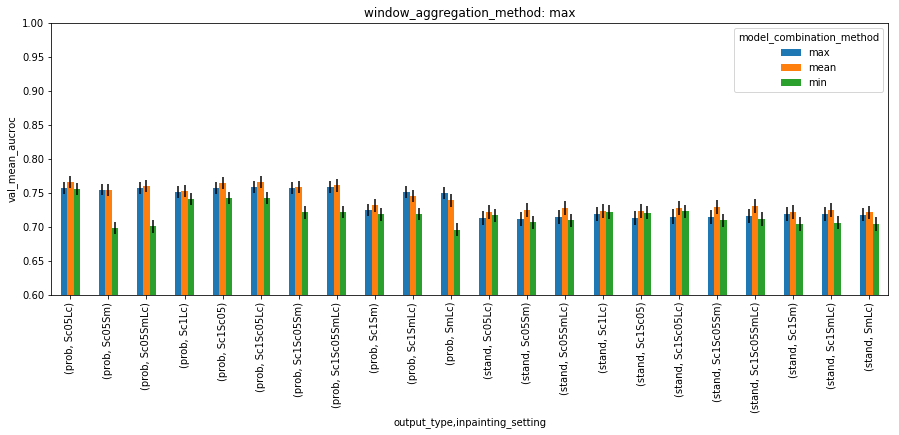

In [77]:
group = ["output_type", "inpainting_setting"] 
variable = "model_combination_method"

filter_variable = "window_aggregation_method"
filter_value = "max"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot_table(index=group, columns=variable, values=y)
yerr_df = filtered_df.pivot_table(index=group, columns=variable, values=yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Conclusions:
if the windiw aaggregation method is max:
* min nearly always works worst, just as for window aggregation
* for standard output, mean always works best. For probabilistic output, except for two cases
    * Maybe when writing the report I can write something about these two cases

Text(0, 0.5, 'val_mean_aucroc')

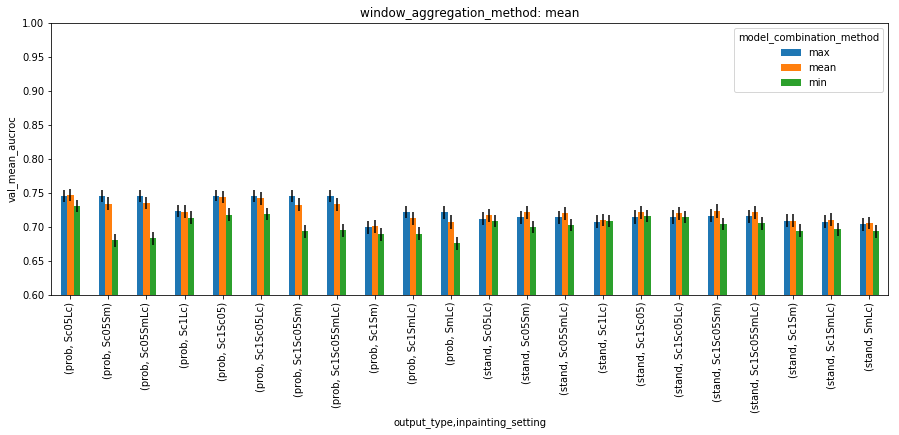

In [78]:
group = ["output_type", "inpainting_setting"] 
variable = "model_combination_method"

filter_variable = "window_aggregation_method"
filter_value = "mean"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot_table(index=group, columns=variable, values=y)
yerr_df = filtered_df.pivot_table(index=group, columns=variable, values=yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Conclusions:
if the window aaggregation method is mean:
* min nearly still always works worst
* for standard output, mean always works best. For probabilistic output, max now works best most of the time
    * maybe write something about this if I want....
    
    
All in all, I'm not too sure what to do with these results....

Anyway, also going back to the table: clearly the best is the combination of:
* probabilistic
* window aggregation by max
* model aggregation by mean

### checking out patch and mask size:

Text(0, 0.5, 'val_mean_aucroc')

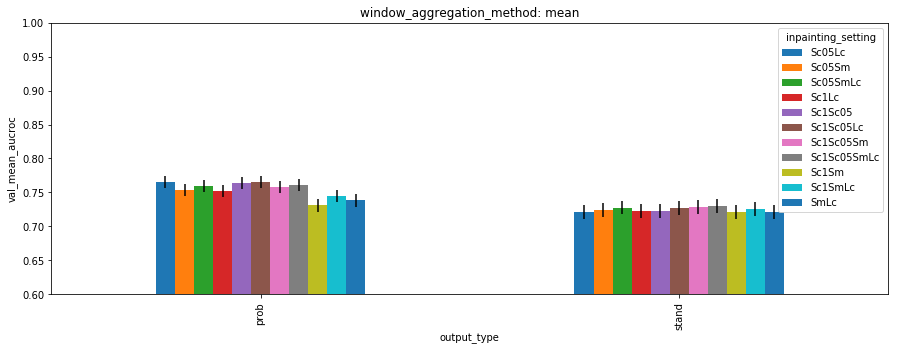

In [80]:
group = "output_type"
variable = "inpainting_setting"

filter_variables = ["window_aggregation_method", "model_combination_method"]
filter_values = ["max", "mean"]

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars

filter_list = [df.loc[:,filter_variable] == filter_value for filter_variable, filter_value in zip(filter_variables, filter_values)]
mask = np.logical_and.reduce(filter_list)
filtered_df = df.loc[mask]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

That plot really doesn't tell me anything

In [82]:
filter_variables = ["window_aggregation_method", "model_combination_method"]
filter_values = ["max", "mean"]
filtered_df

val_mean_aucroc    val_sd  \
experiment_name                                                                 
CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_mean            0.720882  0.219025   
CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_mean           0.721450  0.224934   
CE_DTD_r2_stand___ADcomb_Sc05Lc_win_max_comb_mean          0.721756  0.218614   
CE_DTD_r2_stand___ADcomb_Sc1Lc_win_max_comb_mean           0.722858  0.220726   
CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_max_comb_mean         0.723455  0.223466   
CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_mean          0.724298  0.221762   
CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_max_comb_mean         0.725065  0.222760   
CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_max_comb...         0.727075  0.223147   
CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_max_comb_...         0.727855  0.221928   
CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_max_comb...         0.729208  0.225877   
CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_max_co...         0.729835  0.224457   
CE_DTD_r2_prob___ADcomb_Sc1Sm_win_max_comb_mean            0.731076  0.201942   
CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_mean             0.738408  0.197997   
CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_mean          0.744876  0.197997   
CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_mean            0.751962  0.193199   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_mean           0.753404  0.195743   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_max_comb_...         0.757856  0.196301   
CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_max_comb_mean         0.759799  0.195101   
CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_max_com...         0.760473  0.195470   
CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_max_comb_mean          0.763549  0.190413   
CE_DTD_r2_prob___ADcomb_Sc05Lc_win_max_comb_mean           0.765765  0.190895   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_max_comb_...         0.765874  0.192121   

                                                     val_sem  \
experiment_name                                                
CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_mean     0.010103   
CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_mean    0.010375   
CE_DTD_r2_stand___ADcomb_Sc05Lc_win_max_comb_mean   0.010084   
CE_DTD_r2_stand___ADcomb_Sc1Lc_win_max_comb_mean    0.010181   
CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_max_comb_mean  0.010308   
CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_mean   0.010229   
CE_DTD_r2_stand___ADcomb_Sc1SmLc_win_max_comb_mean  0.010275   
CE_DTD_r2_stand___ADcomb_Sc1Sc05Lc_win_max_comb...  0.010293   
CE_DTD_r2_stand___ADcomb_Sc05SmLc_win_max_comb_...  0.010237   
CE_DTD_r2_stand___ADcomb_Sc1Sc05Sm_win_max_comb...  0.010419   
CE_DTD_r2_stand___ADcomb_Sc1Sc05SmLc_win_max_co...  0.010353   
CE_DTD_r2_prob___ADcomb_Sc1Sm_win_max_comb_mean     0.009315   
CE_DTD_r2_prob___ADcomb_SmLc_win_max_comb_mean      0.009133   
CE_DTD_r2_prob___ADcomb_Sc1SmLc_win_max_comb_mean   0.009133   
CE_DTD_r2_prob___ADcomb_Sc1Lc_win_max_comb_mean     0.008912   
CE_DTD_r2_prob___ADcomb_Sc05Sm_win_max_comb_mean    0.009029   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Sm_win_max_comb_...  0.009055   
CE_DTD_r2_prob___ADcomb_Sc05SmLc_win_max_comb_mean  0.008999   
CE_DTD_r2_prob___ADcomb_Sc1Sc05SmLc_win_max_com...  0.009016   
CE_DTD_r2_prob___ADcomb_Sc1Sc05_win_max_comb_mean   0.008783   
CE_DTD_r2_prob___ADcomb_Sc05Lc_win_max_comb_mean    0.008805   
CE_DTD_r2_prob___ADcomb_Sc1Sc05Lc_win_max_comb_...  0.008862   

                                                    test_mean_aucroc  \
experiment_name                                                        
CE_DTD_r2_stand___ADcomb_SmLc_win_max_comb_mean             0.727538   
CE_DTD_r2_stand___ADcomb_Sc1Sm_win_max_comb_mean            0.726813   
CE_DTD_r2_stand___ADcomb_Sc05Lc_win_max_comb_mean           0.732283   
CE_DTD_r2_stand___ADcomb_Sc1Lc_win_max_comb_mean            0.730352   
CE_DTD_r2_stand___ADcomb_Sc1Sc05_win_max_comb_mean          0.733285   
CE_DTD_r2_stand___ADcomb_Sc05Sm_win_max_comb_mean           0.7340

conclusion: 
* hmm, not too much.
* I guess the only thing that that tells me is that having Sc0.5 in the ensemble is beneficial.

One thing to notice is that the test set seems to be slightly easier than the val set... can happen...

### probabilistic vs non-probabilistic

Text(0, 0.5, 'val_mean_aucroc')

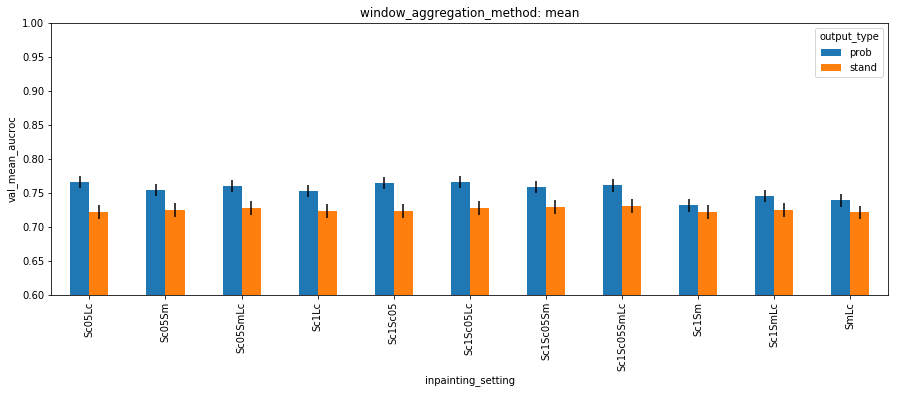

In [83]:
group = "inpainting_setting"
variable = "output_type"

filter_variables = ["window_aggregation_method", "model_combination_method"]
filter_values = ["max", "mean"]

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars

filter_list = [df.loc[:,filter_variable] == filter_value for filter_variable, filter_value in zip(filter_variables, filter_values)]
mask = np.logical_and.reduce(filter_list)
filtered_df = df.loc[mask]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Conclusion:
* the probabilistic version does indeed work better


# Baselines -> Autoencoder

## Training AEs

peak train_loss: 0.0516 in epoch: 175
peak val_loss: 0.0492 in epoch: 174


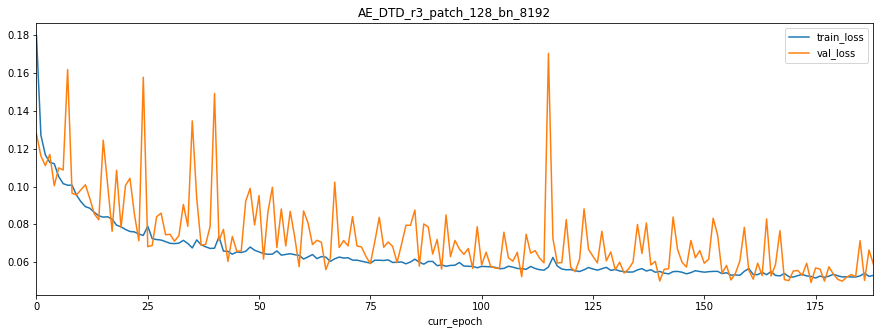

------------------------------------------------------------------
peak train_loss: 0.0534 in epoch: 196
peak val_loss: 0.0502 in epoch: 175


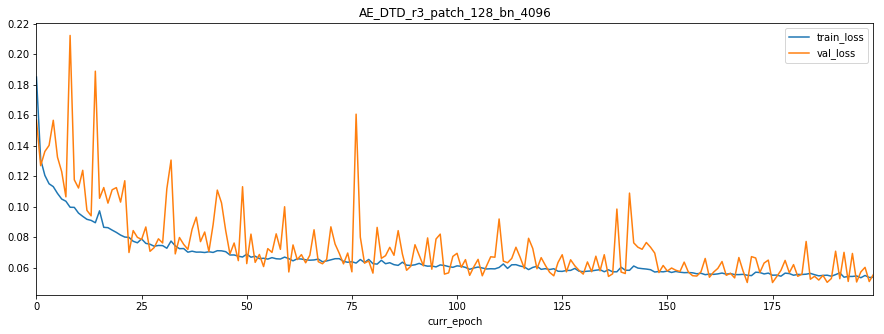

------------------------------------------------------------------
peak train_loss: 0.0560 in epoch: 199
peak val_loss: 0.0527 in epoch: 198


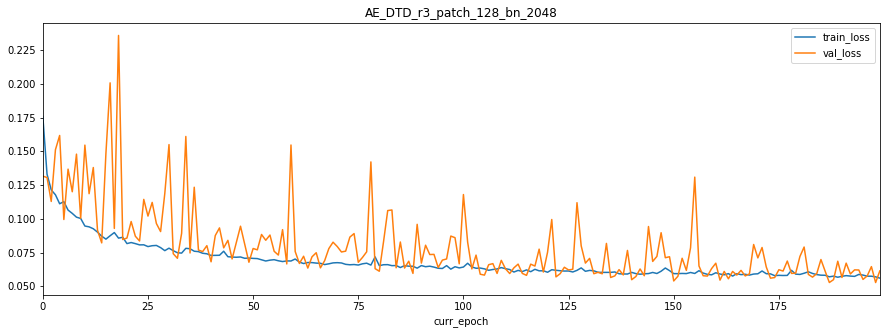

------------------------------------------------------------------
peak train_loss: 0.0603 in epoch: 199
peak val_loss: 0.0551 in epoch: 199


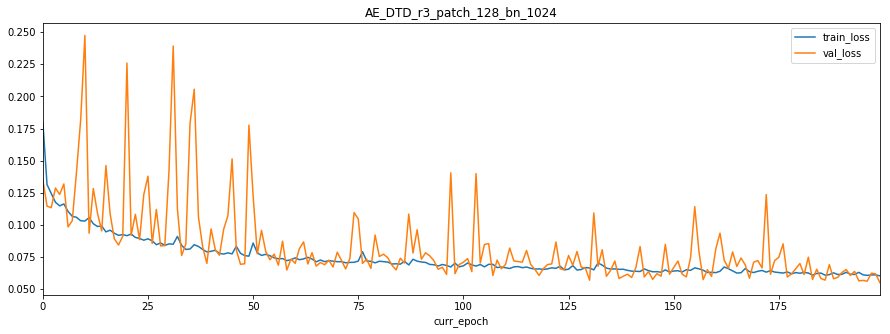

------------------------------------------------------------------
peak train_loss: 0.0666 in epoch: 187
peak val_loss: 0.0595 in epoch: 158


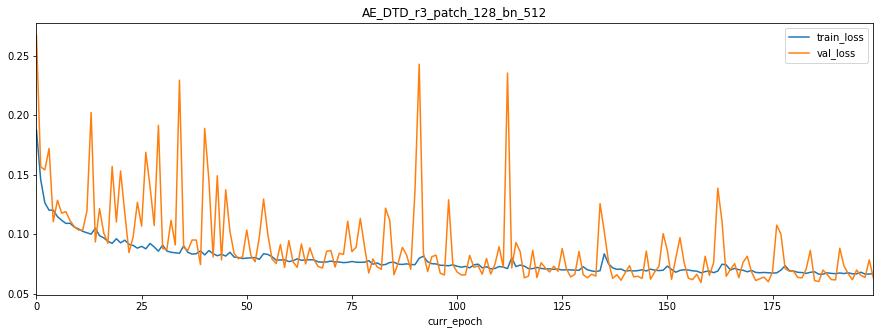

------------------------------------------------------------------
peak train_loss: 0.0724 in epoch: 187
peak val_loss: 0.0657 in epoch: 173


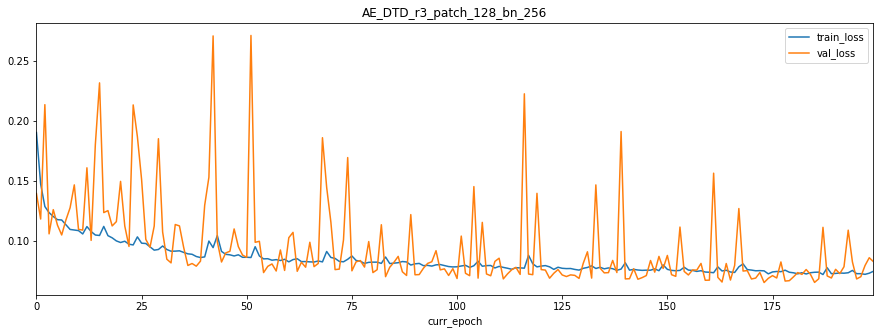

------------------------------------------------------------------
peak train_loss: 0.0795 in epoch: 198
peak val_loss: 0.0720 in epoch: 191


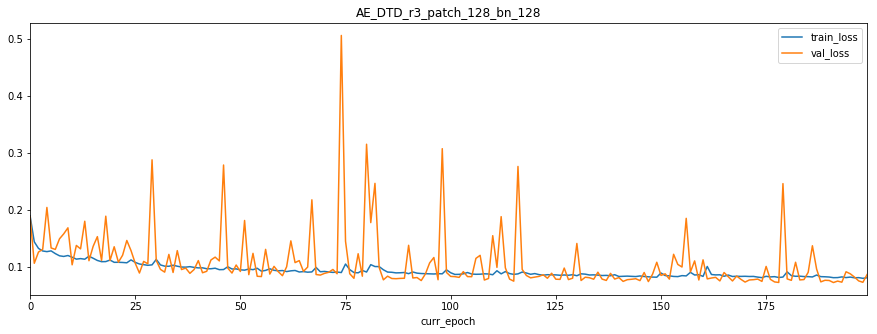

------------------------------------------------------------------
peak train_loss: 0.0320 in epoch: 198
peak val_loss: 0.0295 in epoch: 192


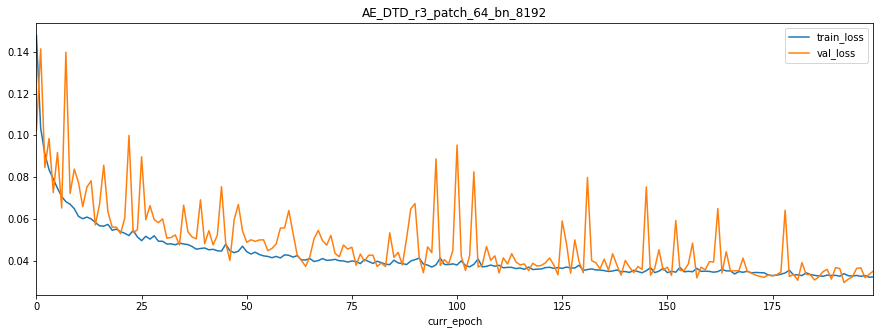

------------------------------------------------------------------
peak train_loss: 0.0336 in epoch: 191
peak val_loss: 0.0312 in epoch: 198


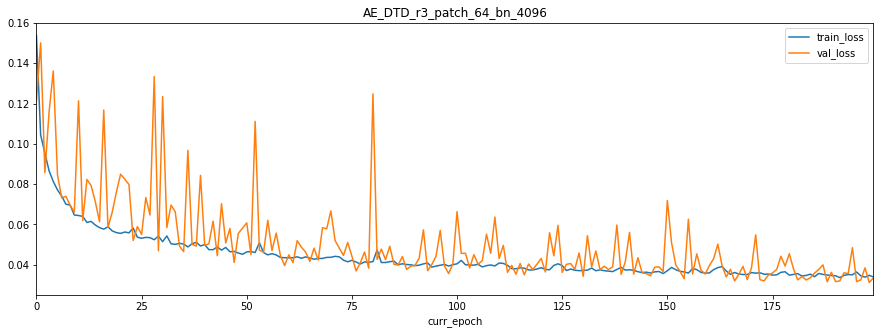

------------------------------------------------------------------
peak train_loss: 0.0372 in epoch: 197
peak val_loss: 0.0347 in epoch: 193


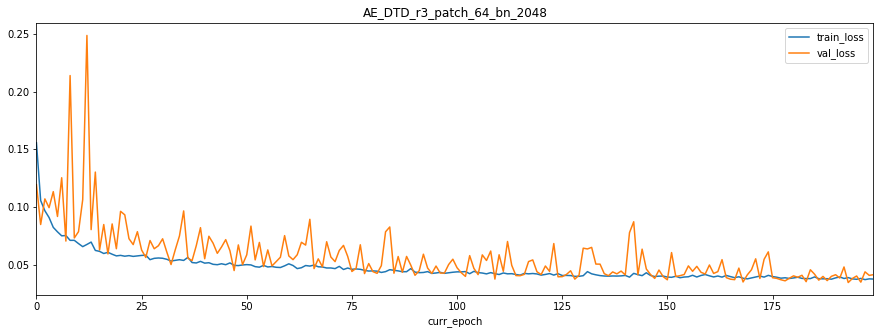

------------------------------------------------------------------
peak train_loss: 0.0402 in epoch: 187
peak val_loss: 0.0353 in epoch: 185


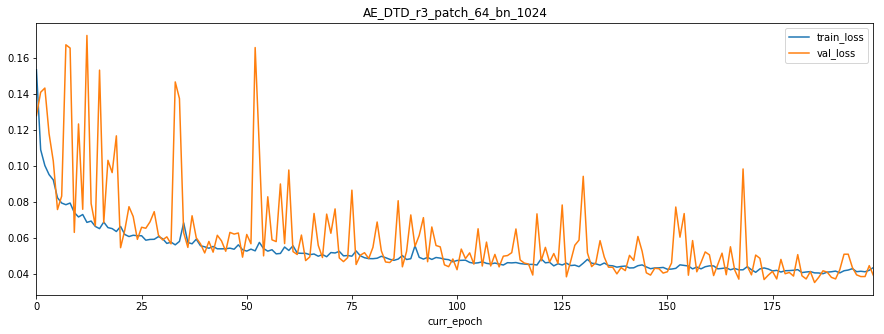

------------------------------------------------------------------
peak train_loss: 0.0461 in epoch: 169
peak val_loss: 0.0425 in epoch: 196


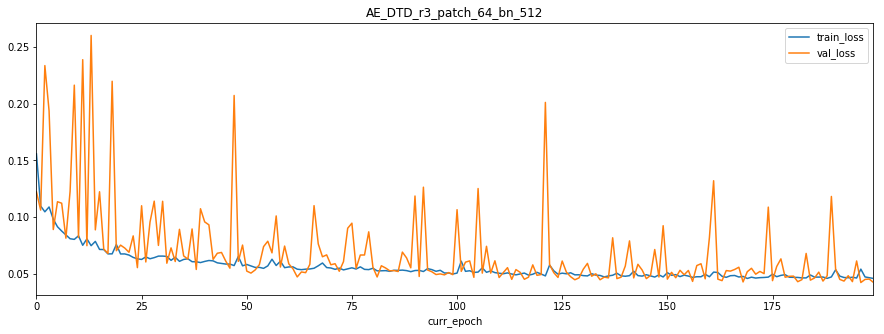

------------------------------------------------------------------
peak train_loss: 0.0499 in epoch: 187
peak val_loss: 0.0447 in epoch: 172


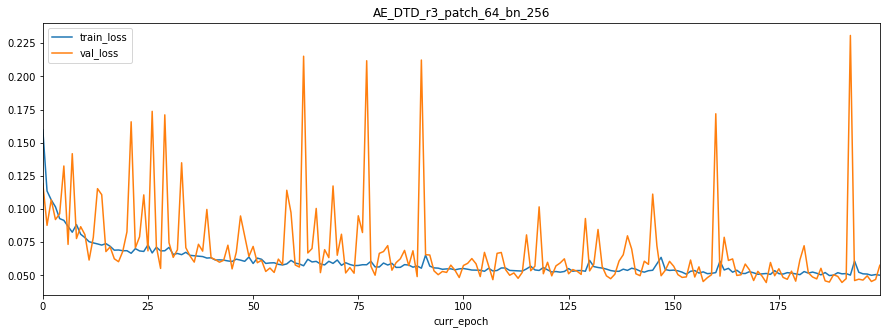

------------------------------------------------------------------
peak train_loss: 0.0559 in epoch: 198
peak val_loss: 0.0506 in epoch: 192


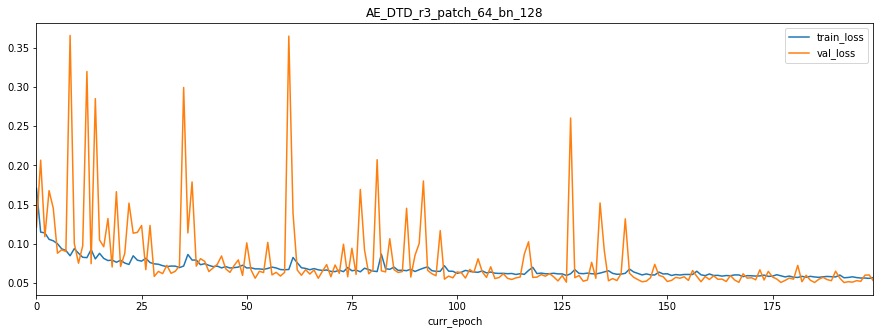

------------------------------------------------------------------
peak train_loss: 0.0337 in epoch: 199
peak val_loss: 0.0602 in epoch: 177


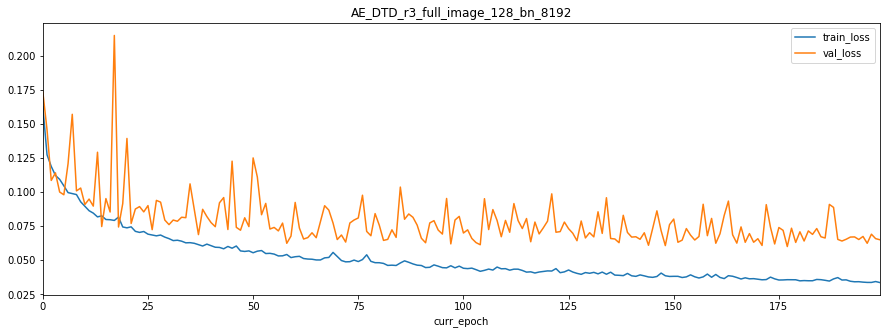

------------------------------------------------------------------
peak train_loss: 0.0379 in epoch: 189
peak val_loss: 0.0626 in epoch: 194


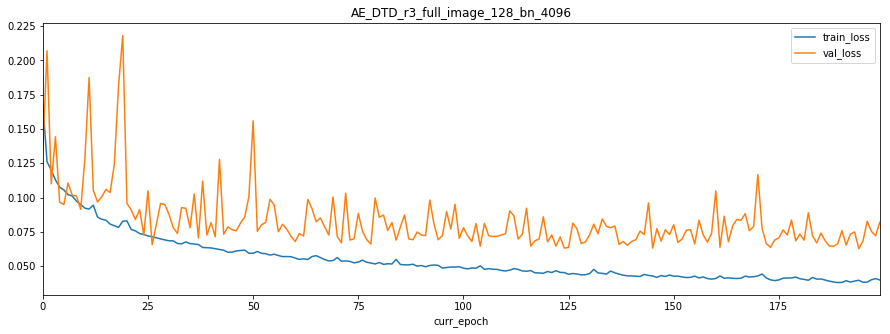

------------------------------------------------------------------
peak train_loss: 0.0396 in epoch: 195
peak val_loss: 0.0638 in epoch: 194


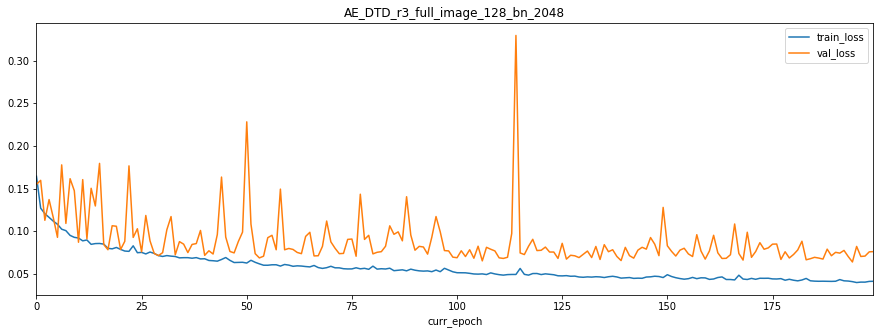

------------------------------------------------------------------
peak train_loss: 0.0435 in epoch: 192
peak val_loss: 0.0672 in epoch: 190


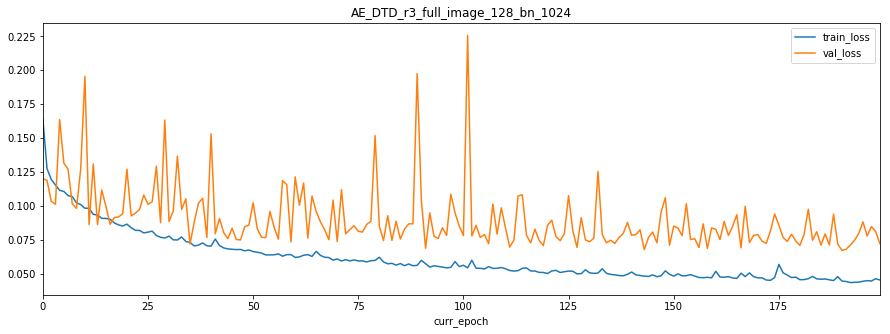

------------------------------------------------------------------
peak train_loss: 0.0493 in epoch: 188
peak val_loss: 0.0718 in epoch: 126


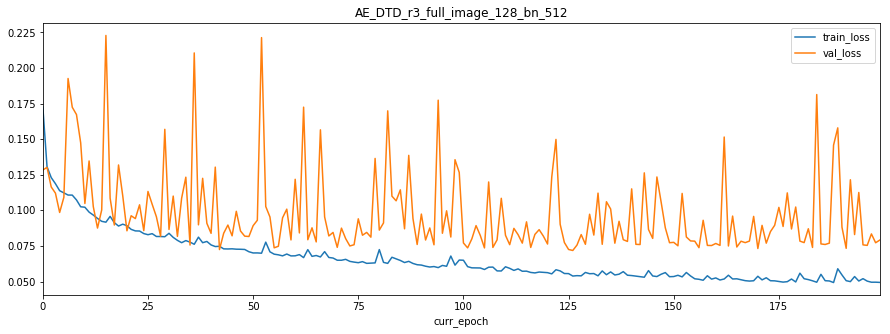

------------------------------------------------------------------
peak train_loss: 0.0559 in epoch: 185
peak val_loss: 0.0758 in epoch: 37


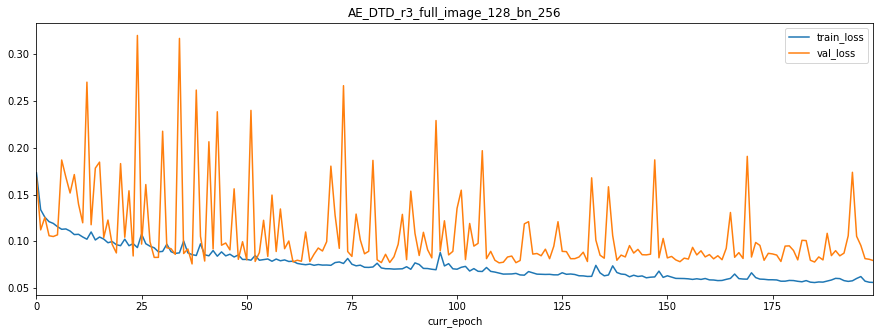

------------------------------------------------------------------
peak train_loss: 0.0597 in epoch: 197
peak val_loss: 0.0801 in epoch: 52


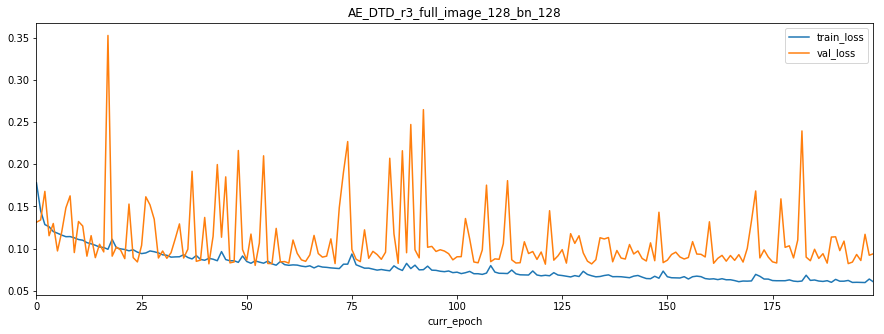

------------------------------------------------------------------


In [4]:
# just show all experiments
experiment_names = ["AE_DTD_r3_patch_128_bn_8192",
                    "AE_DTD_r3_patch_128_bn_4096",
                    "AE_DTD_r3_patch_128_bn_2048",
                    "AE_DTD_r3_patch_128_bn_1024",
                    "AE_DTD_r3_patch_128_bn_512",
                    "AE_DTD_r3_patch_128_bn_256",
                    "AE_DTD_r3_patch_128_bn_128",
                    "AE_DTD_r3_patch_64_bn_8192",
                    "AE_DTD_r3_patch_64_bn_4096",
                    "AE_DTD_r3_patch_64_bn_2048",
                    "AE_DTD_r3_patch_64_bn_1024",
                    "AE_DTD_r3_patch_64_bn_512",
                    "AE_DTD_r3_patch_64_bn_256",
                    "AE_DTD_r3_patch_64_bn_128",
                    "AE_DTD_r3_full_image_128_bn_8192",
                    "AE_DTD_r3_full_image_128_bn_4096",
                    "AE_DTD_r3_full_image_128_bn_2048",
                    "AE_DTD_r3_full_image_128_bn_1024",
                    "AE_DTD_r3_full_image_128_bn_512",
                    "AE_DTD_r3_full_image_128_bn_256",
                    "AE_DTD_r3_full_image_128_bn_128"]

ns = [1]*21

variables_to_show = "all" #[["all"]]*4 + [["loss","map_mse_range11"]]*4

show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

In [5]:
experiment_names = ["AE_DTD_r3_patch_128_bn_8192",
                    "AE_DTD_r3_patch_128_bn_4096",
                    "AE_DTD_r3_patch_128_bn_2048",
                    "AE_DTD_r3_patch_128_bn_1024",
                    "AE_DTD_r3_patch_128_bn_512",
                    "AE_DTD_r3_patch_128_bn_256",
                    "AE_DTD_r3_patch_128_bn_128",
                    "AE_DTD_r3_patch_64_bn_8192",
                    "AE_DTD_r3_patch_64_bn_4096",
                    "AE_DTD_r3_patch_64_bn_2048",
                    "AE_DTD_r3_patch_64_bn_1024",
                    "AE_DTD_r3_patch_64_bn_512",
                    "AE_DTD_r3_patch_64_bn_256",
                    "AE_DTD_r3_patch_64_bn_128",
                    "AE_DTD_r3_full_image_128_bn_8192",
                    "AE_DTD_r3_full_image_128_bn_4096",
                    "AE_DTD_r3_full_image_128_bn_2048",
                    "AE_DTD_r3_full_image_128_bn_1024",
                    "AE_DTD_r3_full_image_128_bn_512",
                    "AE_DTD_r3_full_image_128_bn_256",
                    "AE_DTD_r3_full_image_128_bn_128"]

ns = [1]*21
print_table_peak_values(experiment_names, ns) 

experiment train_loss   val_loss
0       AE_DTD_r3_patch_128_bn_8192  0.0516068  0.0492288
0       AE_DTD_r3_patch_128_bn_4096  0.0533948  0.0502432
0       AE_DTD_r3_patch_128_bn_2048  0.0560278  0.0527373
0       AE_DTD_r3_patch_128_bn_1024  0.0603027  0.0551064
0        AE_DTD_r3_patch_128_bn_512  0.0665506  0.0595346
0        AE_DTD_r3_patch_128_bn_256  0.0723773  0.0657238
0        AE_DTD_r3_patch_128_bn_128  0.0794583  0.0720423
0        AE_DTD_r3_patch_64_bn_8192  0.0320041  0.0294886
0        AE_DTD_r3_patch_64_bn_4096  0.0336083  0.0311588
0        AE_DTD_r3_patch_64_bn_2048   0.037173  0.0346504
0        AE_DTD_r3_patch_64_bn_1024  0.0402375  0.0353338
0         AE_DTD_r3_patch_64_bn_512  0.0461303  0.0425459
0         AE_DTD_r3_patch_64_bn_256  0.0499233   0.044656
0         AE_DTD_r3_patch_64_bn_128  0.0559015  0.0505856
0  AE_DTD_r3_full_image_128_bn_8192  0.0337336  0.0601599
0  AE_DTD_r3_full_image_128_bn_4096  0.0379455  0.0626495
0  AE_DTD_r3_full_image_128_bn_2048  0.0395855  0.0637547
0  AE_DTD_r3_full_image_128_bn_1024  0.0435437  0.0672101
0   AE_DTD_r3_full_image_128_bn_512  0.0493072  0.0718319
0   AE_DTD_r3_full_image_128_bn_256   0.055853  0.0757717
0   AE_DTD_r3_full_image_128_bn_128  0.0596911  0.0800624

Conclusions:
    * all autoencoders learn, and thats what I wanted :-)
    * let's look at a few images in the word file

## Anomaly detection with AEs 
(baselines -> autoencoders -> anomaly detection)

In [88]:
experiment_names = [
'AE_DTD_r3_patch_128_bn_8192___AD_window_min',
'AE_DTD_r3_patch_128_bn_8192___AD_window_mean',
'AE_DTD_r3_patch_128_bn_8192___AD_window_max',
'AE_DTD_r3_patch_128_bn_4096___AD_window_min',
'AE_DTD_r3_patch_128_bn_4096___AD_window_mean',
'AE_DTD_r3_patch_128_bn_4096___AD_window_max',
'AE_DTD_r3_patch_128_bn_2048___AD_window_min',
'AE_DTD_r3_patch_128_bn_2048___AD_window_mean',
'AE_DTD_r3_patch_128_bn_2048___AD_window_max',
'AE_DTD_r3_patch_128_bn_1024___AD_window_min',
'AE_DTD_r3_patch_128_bn_1024___AD_window_mean',
'AE_DTD_r3_patch_128_bn_1024___AD_window_max',
'AE_DTD_r3_patch_128_bn_512___AD_window_min',
'AE_DTD_r3_patch_128_bn_512___AD_window_mean',
'AE_DTD_r3_patch_128_bn_512___AD_window_max',
'AE_DTD_r3_patch_128_bn_256___AD_window_min',
'AE_DTD_r3_patch_128_bn_256___AD_window_mean',
'AE_DTD_r3_patch_128_bn_256___AD_window_max',
'AE_DTD_r3_patch_128_bn_128___AD_window_min',
'AE_DTD_r3_patch_128_bn_128___AD_window_mean',
'AE_DTD_r3_patch_128_bn_128___AD_window_max',
'AE_DTD_r3_patch_64_bn_8192___AD_window_min',
'AE_DTD_r3_patch_64_bn_8192___AD_window_mean',
'AE_DTD_r3_patch_64_bn_8192___AD_window_max',
'AE_DTD_r3_patch_64_bn_4096___AD_window_min',
'AE_DTD_r3_patch_64_bn_4096___AD_window_mean',
'AE_DTD_r3_patch_64_bn_4096___AD_window_max',
'AE_DTD_r3_patch_64_bn_2048___AD_window_min',
'AE_DTD_r3_patch_64_bn_2048___AD_window_mean',
'AE_DTD_r3_patch_64_bn_2048___AD_window_max',
'AE_DTD_r3_patch_64_bn_1024___AD_window_min',
'AE_DTD_r3_patch_64_bn_1024___AD_window_mean',
'AE_DTD_r3_patch_64_bn_1024___AD_window_max',
'AE_DTD_r3_patch_64_bn_512___AD_window_min',
'AE_DTD_r3_patch_64_bn_512___AD_window_mean',
'AE_DTD_r3_patch_64_bn_512___AD_window_max',
'AE_DTD_r3_patch_64_bn_256___AD_window_min',
'AE_DTD_r3_patch_64_bn_256___AD_window_mean',
'AE_DTD_r3_patch_64_bn_256___AD_window_max',
'AE_DTD_r3_patch_64_bn_128___AD_window_min',
'AE_DTD_r3_patch_64_bn_128___AD_window_mean',
'AE_DTD_r3_patch_64_bn_128___AD_window_max',
'AE_DTD_r3_full_image_128_bn_8192___AD_window_min',
'AE_DTD_r3_full_image_128_bn_8192___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_8192___AD_window_max',
'AE_DTD_r3_full_image_128_bn_4096___AD_window_min',
'AE_DTD_r3_full_image_128_bn_4096___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_4096___AD_window_max',
'AE_DTD_r3_full_image_128_bn_2048___AD_window_min',
'AE_DTD_r3_full_image_128_bn_2048___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_2048___AD_window_max',
'AE_DTD_r3_full_image_128_bn_1024___AD_window_min',
'AE_DTD_r3_full_image_128_bn_1024___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_1024___AD_window_max',
'AE_DTD_r3_full_image_128_bn_512___AD_window_min',
'AE_DTD_r3_full_image_128_bn_512___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_512___AD_window_max',
'AE_DTD_r3_full_image_128_bn_256___AD_window_min',
'AE_DTD_r3_full_image_128_bn_256___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_256___AD_window_max',
'AE_DTD_r3_full_image_128_bn_128___AD_window_min',
'AE_DTD_r3_full_image_128_bn_128___AD_window_mean',
'AE_DTD_r3_full_image_128_bn_128___AD_window_max'
]

features = "r3"
sort_column = "val_mean_aucroc"

df = summary_stats(experiment_names, features, sort_column)

val_mean_aucroc    val_sd  \
experiment_name                                                                
AE_DTD_r3_patch_64_bn_8192___AD_window_min                0.596817  0.169037   
AE_DTD_r3_patch_64_bn_2048___AD_window_min                0.608752  0.176231   
AE_DTD_r3_patch_64_bn_4096___AD_window_min                0.613225  0.168189   
AE_DTD_r3_patch_64_bn_256___AD_window_min                 0.613767  0.188948   
AE_DTD_r3_patch_64_bn_128___AD_window_min                 0.617451  0.183771   
AE_DTD_r3_patch_64_bn_512___AD_window_min                 0.618255  0.185284   
AE_DTD_r3_patch_64_bn_1024___AD_window_min                0.620754  0.179170   
AE_DTD_r3_patch_128_bn_2048___AD_window_min               0.629033  0.195423   
AE_DTD_r3_patch_64_bn_8192___AD_window_mean               0.629366  0.196232   
AE_DTD_r3_patch_64_bn_4096___AD_window_max                0.629626  0.200915   
AE_DTD_r3_patch_128_bn_8192___AD_window_min               0.629811  0.188358   
AE_DTD_r3_patch_64_bn_4096___AD_window_mean               0.630168  0.193333   
AE_DTD_r3_patch_64_bn_8192___AD_window_max                0.634818  0.202603   
AE_DTD_r3_patch_128_bn_4096___AD_window_min               0.637545  0.189076   
AE_DTD_r3_patch_64_bn_2048___AD_window_max                0.638552  0.203344   
AE_DTD_r3_patch_64_bn_2048___AD_window_mean               0.638939  0.199394   
AE_DTD_r3_patch_64_bn_256___AD_window_mean                0.642893  0.197774   
AE_DTD_r3_patch_64_bn_1024___AD_window_mean               0.646002  0.201362   
AE_DTD_r3_patch_64_bn_128___AD_window_mean                0.646334  0.194694   
AE_DTD_r3_patch_64_bn_512___AD_window_mean                0.648150  0.196854   
AE_DTD_r3_patch_64_bn_1024___AD_window_max                0.649672  0.207532   
AE_DTD_r3_patch_128_bn_8192___AD_window_mean              0.649870  0.198443   
AE_DTD_r3_patch_64_bn_512___AD_window_max                 0.651570  0.203308   
AE_DTD_r3_patch_128_bn_4096___AD_window_mean              0.653190  0.196276   
AE_DTD_r3_patch_128_bn_512___AD_window_min                0.654607  0.198176   
AE_DTD_r3_patch_128_bn_2048___AD_window_mean              0.654646  0.198853   
AE_DTD_r3_patch_64_bn_256___AD_window_max                 0.654782  0.205850   
AE_DTD_r3_patch_64_bn_128___AD_window_max                 0.658144  0.203887   
AE_DTD_r3_patch_128_bn_4096___AD_window_max               0.659561  0.203965   
AE_DTD_r3_full_image_128_bn_256___AD_window_max           0.659847  0.215697   
...                                                            ...       ...   
AE_DTD_r3_patch_128_bn_8192___AD_window_max               0.664296  0.205005   
AE_DTD_r3_full_image_128_bn_8192___AD_window_max          0.667170  0.215476   
AE_DTD_r3_patch_128_bn_1024___AD_window_max               0.668357  0.202821   
AE_DTD_r3_full_image_128_bn_512___AD_window_max           0.669856  0.221221   
AE_DTD_r3_full_image_128_bn_128___AD_window_max           0.670085  0.214407   
AE_DTD_r3_patch_128_bn_512___AD_window_mean               0.670642  0.198764   
AE_DTD_r3_full_image_128_bn_4096___AD_window_max          0.671404  0.214669   
AE_DTD_r3_full_image_128_bn_2048___AD_window_max          0.672257  0.216274   
AE_DTD_r3_full_image_128_bn_8192___AD_window_min          0.672270  0.191664   
AE_DTD_r3_patch_128_bn_1024___AD_window_mean              0.672340  0.198962   
AE_DTD_r3_full_image_128_bn_4096___AD_window_min          0.672627  0.196554   
AE_DTD_r3_full_image_128_bn_1024___AD_window_max          0.673877  0.217293   
AE_DTD_r3_full_image_128_bn_2048___AD_window_min          0.674919  0.193953   
AE_DTD_r3_patch_128_bn_512___AD_window_max                0.675046  0.206789   
AE_DTD_r3_full_image_128_bn_256___AD_window_min           0.675975  0.199681   
AE_DTD_r3_patch_128_bn_256___AD_window_mean               0.677738  0.197501   
AE_DTD_r3_full_image_128_bn_512___AD_window_min           0.678714  0.197100   
AE_DTD_r3_patch_128_bn_128___AD_window_min         

Conclusion: 
* best autoencoder gets 0.698 AUC.
* best non-probabilistic context_encoder (without ensembling) gets 0.7126
    * the 128x128 patch, 64x64 mask size gets 0.7095
* best probabilistic CE without ensembeling gets 0.751
* best ensembled model gets 0.765

### sorted by train experiment
So that you can compare the effect of window aggregation method

Text(0, 0.5, 'val_mean_aucroc')

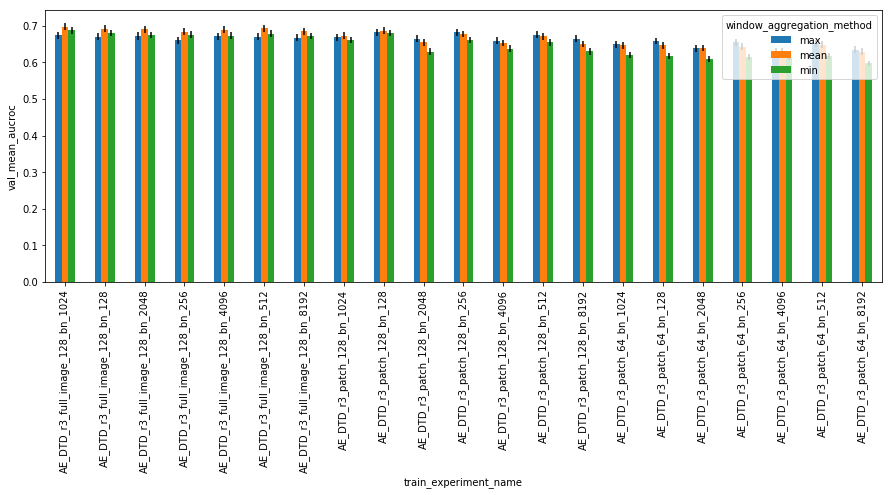

In [89]:
group = "train_experiment_name"
variable = "window_aggregation_method"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars



data_df = df.pivot(group, variable, y)
yerr_df = df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5))
ax.set_ylabel(y)

Conclusions:
* min is never best
* its always mean or max that works best
* interestingly, mean works better for the gropus that are already good, max better for the groups that aren't good yet.    

So let's look at only mean and max, and check out patch and mask size

### checking out bottleneck size

Text(0, 0.5, 'val_mean_aucroc')

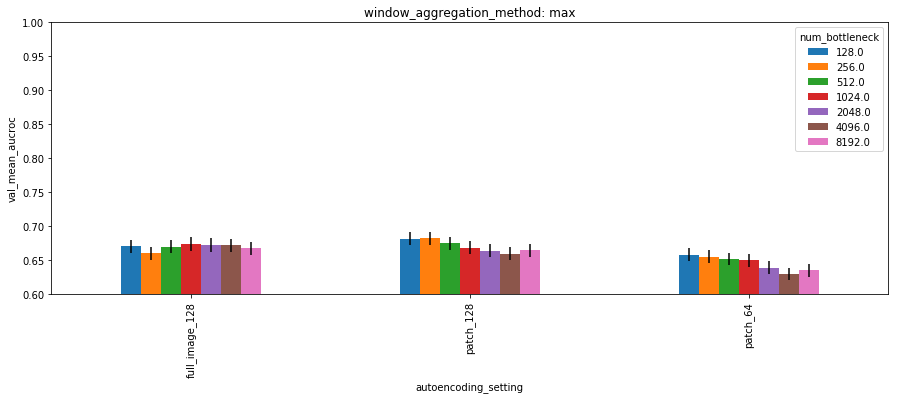

In [90]:
group = "autoencoding_setting"
variable = "num_bottleneck"

filter_variable = "window_aggregation_method"
filter_value = "max"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Text(0, 0.5, 'val_mean_aucroc')

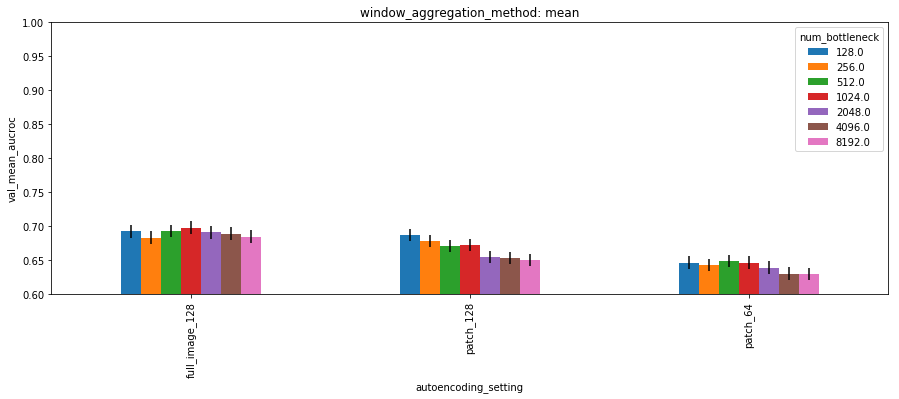

In [91]:
group = "autoencoding_setting"
variable = "num_bottleneck"

filter_variable = "window_aggregation_method"
filter_value = "mean"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

* hmm, not really sure what's going on here.
* for the patches, too high capacity doesn't seem good
* for full image, it seems less of a problem

### checking out autoencoder setting

Text(0, 0.5, 'val_mean_aucroc')

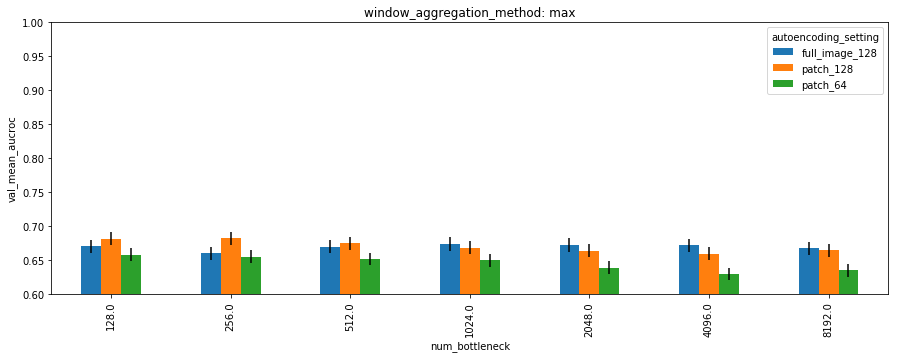

In [93]:
group = "num_bottleneck"
variable = "autoencoding_setting"

filter_variable = "window_aggregation_method"
filter_value = "max"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

Text(0, 0.5, 'val_mean_aucroc')

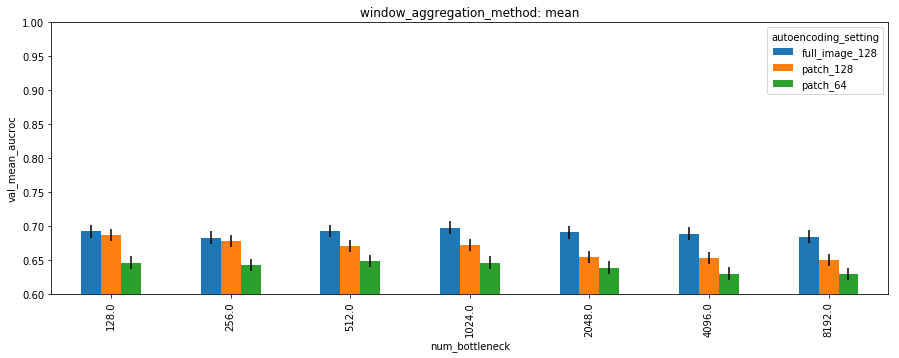

In [94]:
group = "num_bottleneck"
variable = "autoencoding_setting"

filter_variable = "window_aggregation_method"
filter_value = "mean"

y = "val_mean_aucroc" # all column names that contain this string are plotted
yerr = "val_sem" #  all column names that contain this string are error bars


filtered_df = df.loc[df.loc[:,filter_variable] == filter_value,:]
data_df = filtered_df.pivot(group, variable, y)
yerr_df = filtered_df.pivot(group, variable, yerr)


ax = data_df.plot(kind="bar", yerr=yerr_df, figsize=(15,5), ylim=[0.6,1], title=filter_variable + ": " + filter_value)
ax.set_ylabel(y)

conclusion: 
* ok, now this does seem interesting, I can probably do something with this in the report

# Mias

## setup experiments

### augmentations

peak train_loss: 3.0888 in epoch: 198
peak val_loss: 3.1349 in epoch: 170
peak train_map_mse_range11: 0.0050 in epoch: 190
peak val_map_mse_range11: 0.0055 in epoch: 198


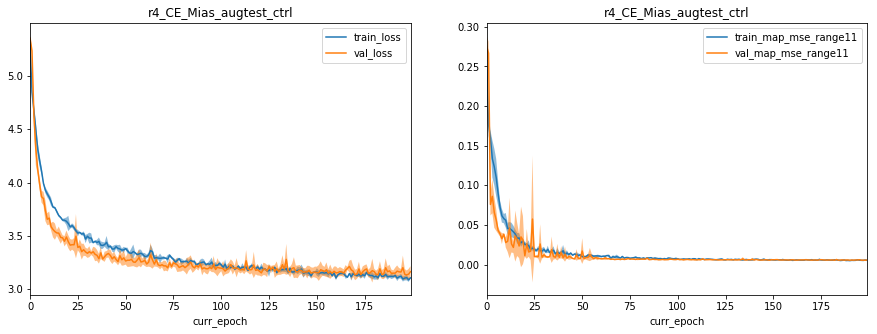

------------------------------------------------------------------
peak train_loss: 3.1376 in epoch: 193
peak val_loss: 3.0693 in epoch: 180
peak train_map_mse_range11: 0.0055 in epoch: 173
peak val_map_mse_range11: 0.0054 in epoch: 191


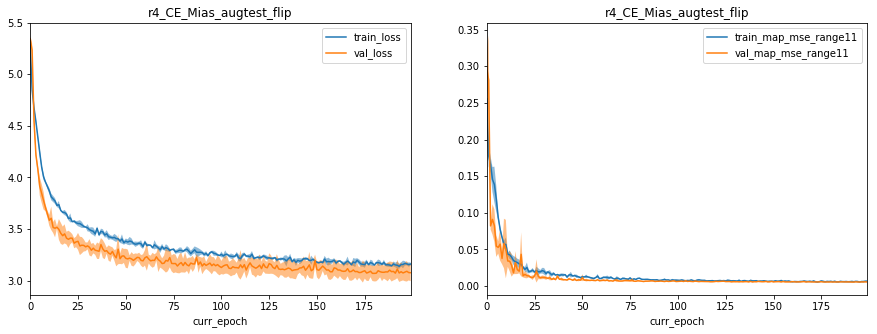

------------------------------------------------------------------
peak train_loss: 3.1170 in epoch: 197
peak val_loss: 3.2559 in epoch: 178
peak train_map_mse_range11: 0.0058 in epoch: 195
peak val_map_mse_range11: 0.0061 in epoch: 193


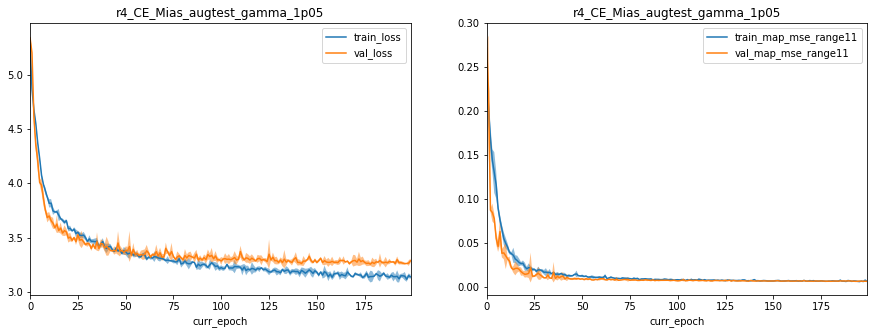

------------------------------------------------------------------
peak train_loss: 3.1116 in epoch: 186
peak val_loss: 3.3239 in epoch: 147
peak train_map_mse_range11: 0.0056 in epoch: 192
peak val_map_mse_range11: 0.0059 in epoch: 187


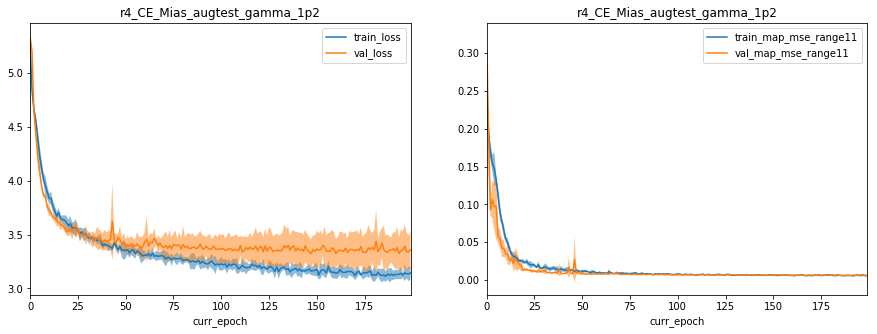

------------------------------------------------------------------
peak train_loss: 3.0870 in epoch: 194
peak val_loss: 3.2546 in epoch: 177
peak train_map_mse_range11: 0.0057 in epoch: 194
peak val_map_mse_range11: 0.0056 in epoch: 196


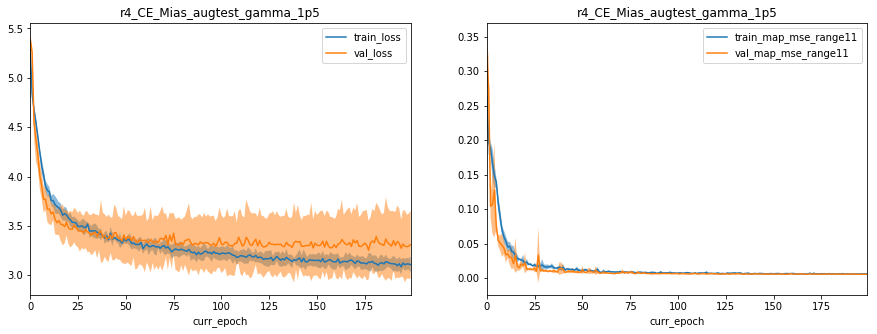

------------------------------------------------------------------
peak train_loss: 3.0762 in epoch: 196
peak val_loss: 4.2814 in epoch: 18
peak train_map_mse_range11: 0.0064 in epoch: 188
peak val_map_mse_range11: 0.0056 in epoch: 197


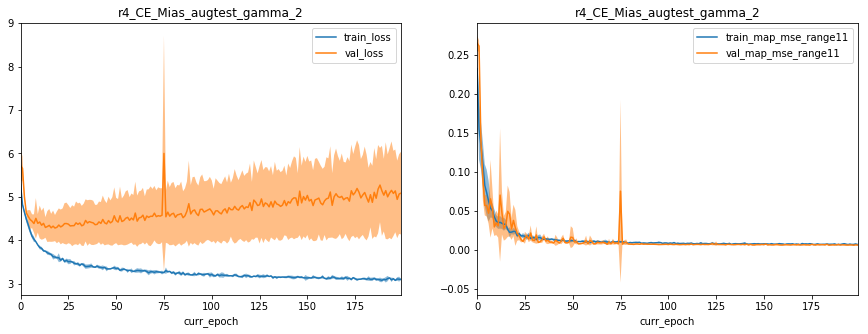

------------------------------------------------------------------
peak train_loss: 3.1512 in epoch: 194
peak val_loss: 3.1056 in epoch: 199
peak train_map_mse_range11: 0.0057 in epoch: 192
peak val_map_mse_range11: 0.0057 in epoch: 187


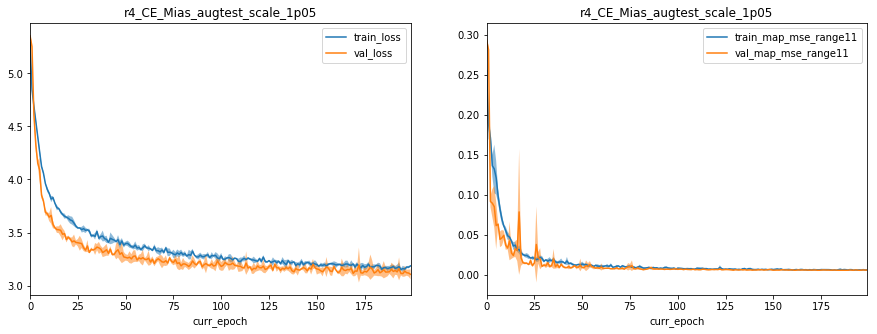

------------------------------------------------------------------
peak train_loss: 3.1577 in epoch: 187
peak val_loss: 3.0623 in epoch: 175
peak train_map_mse_range11: 0.0063 in epoch: 195
peak val_map_mse_range11: 0.0053 in epoch: 181


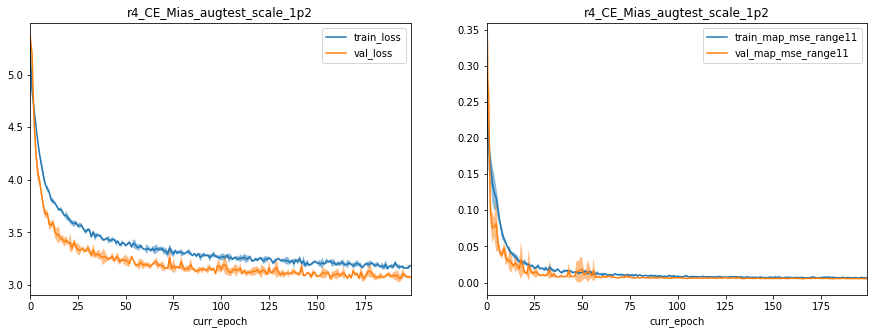

------------------------------------------------------------------
peak train_loss: 3.1265 in epoch: 196
peak val_loss: 3.0828 in epoch: 196
peak train_map_mse_range11: 0.0077 in epoch: 196
peak val_map_mse_range11: 0.0054 in epoch: 196


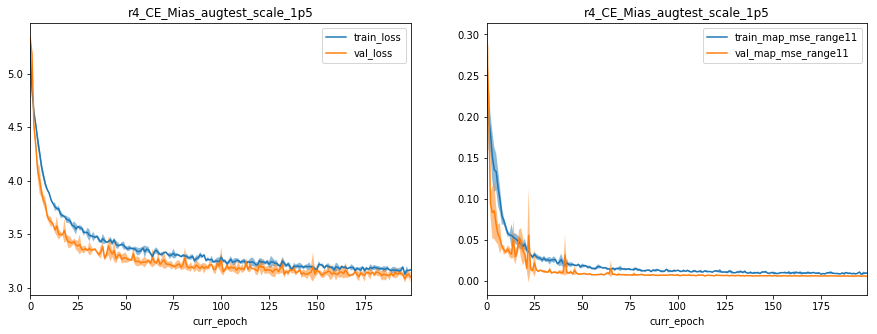

------------------------------------------------------------------
peak train_loss: 3.1462 in epoch: 192
peak val_loss: 3.1175 in epoch: 183
peak train_map_mse_range11: 0.0057 in epoch: 190
peak val_map_mse_range11: 0.0057 in epoch: 195


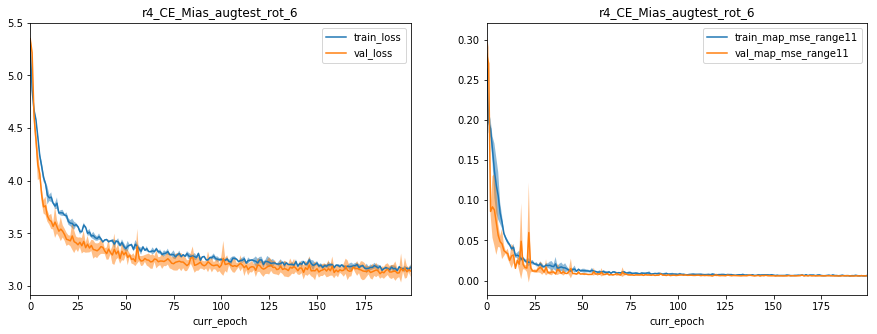

------------------------------------------------------------------
peak train_loss: 3.1473 in epoch: 187
peak val_loss: 3.0737 in epoch: 196
peak train_map_mse_range11: 0.0062 in epoch: 192
peak val_map_mse_range11: 0.0054 in epoch: 192


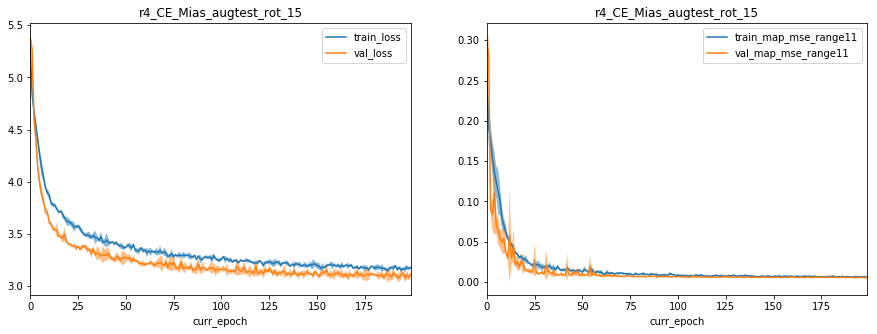

------------------------------------------------------------------
peak train_loss: 3.0872 in epoch: 187
peak val_loss: 3.1317 in epoch: 191
peak train_map_mse_range11: 0.0081 in epoch: 198
peak val_map_mse_range11: 0.0058 in epoch: 188


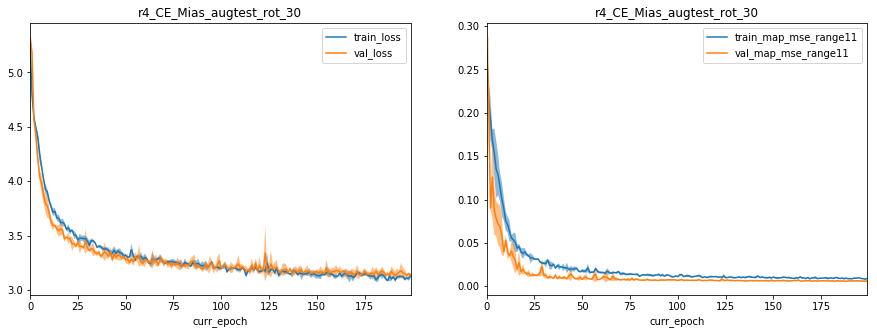

------------------------------------------------------------------
peak train_loss: 3.1376 in epoch: 193
peak val_loss: 3.0334 in epoch: 193
peak train_map_mse_range11: 0.0056 in epoch: 197
peak val_map_mse_range11: 0.0052 in epoch: 185


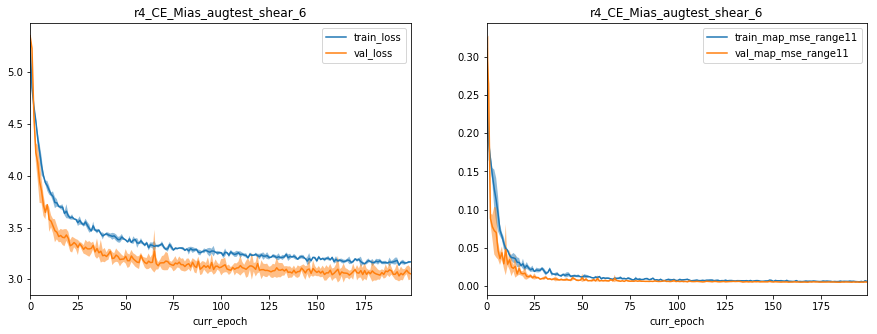

------------------------------------------------------------------
peak train_loss: 3.1144 in epoch: 189
peak val_loss: 3.1187 in epoch: 171
peak train_map_mse_range11: 0.0065 in epoch: 194
peak val_map_mse_range11: 0.0056 in epoch: 197


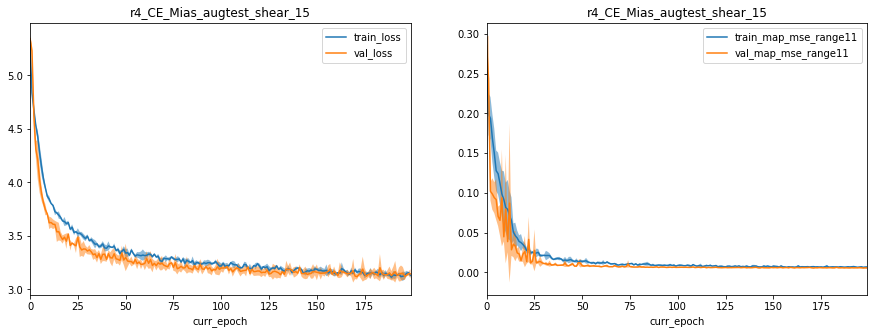

------------------------------------------------------------------
peak train_loss: 2.9960 in epoch: 196
peak val_loss: 3.1055 in epoch: 196
peak train_map_mse_range11: 0.0100 in epoch: 189
peak val_map_mse_range11: 0.0055 in epoch: 184


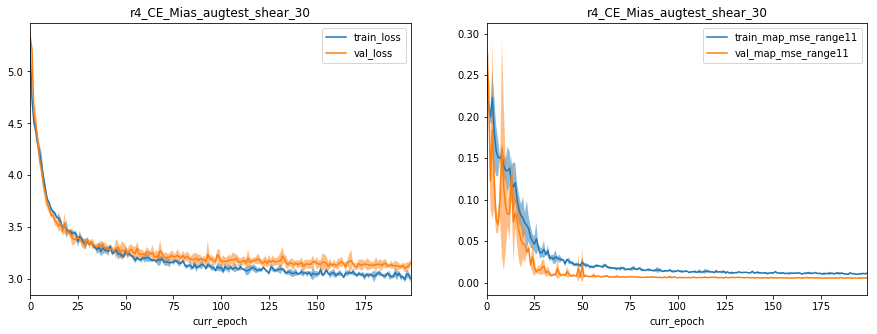

------------------------------------------------------------------
peak train_loss: 3.0957 in epoch: 197
peak val_loss: 3.6110 in epoch: 81
peak train_map_mse_range11: 0.0066 in epoch: 188
peak val_map_mse_range11: 0.0058 in epoch: 198


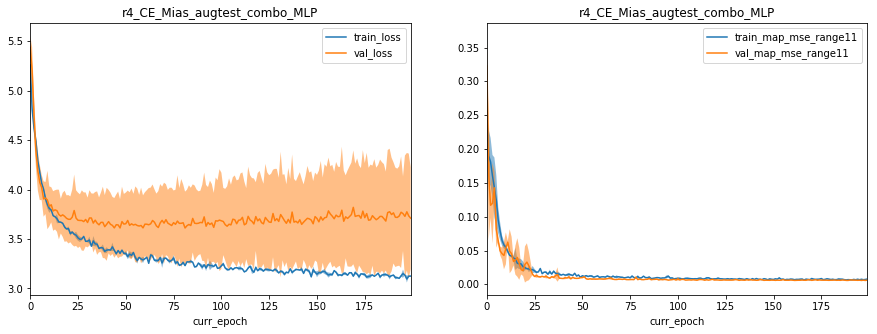

------------------------------------------------------------------


In [53]:
experiment_names = ["r4_CE_Mias_augtest_ctrl",
                    
                    "r4_CE_Mias_augtest_flip", 
                    
                    "r4_CE_Mias_augtest_gamma_1p05",
                    "r4_CE_Mias_augtest_gamma_1p2",
                    "r4_CE_Mias_augtest_gamma_1p5",
                    "r4_CE_Mias_augtest_gamma_2",
                    
                    "r4_CE_Mias_augtest_scale_1p05",
                    "r4_CE_Mias_augtest_scale_1p2",
                    "r4_CE_Mias_augtest_scale_1p5",
                    
                    "r4_CE_Mias_augtest_rot_6",
                    "r4_CE_Mias_augtest_rot_15",
                    "r4_CE_Mias_augtest_rot_30",
                    
                    "r4_CE_Mias_augtest_shear_6",
                    "r4_CE_Mias_augtest_shear_15",
                    "r4_CE_Mias_augtest_shear_30",
                    
                    "r4_CE_Mias_augtest_combo_MLP",]


sort_column = "val_mean_aucroc"
variables_to_show = [["loss", "map_mse_range11"]] * len(experiment_names)

ns = [3] * len(experiment_names)


show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

In [118]:
experiment_names = ["r4_CE_Mias_augtest_ctrl",
                    
                    "r4_CE_Mias_augtest_flip", 
                    
                    "r4_CE_Mias_augtest_gamma_1p05",
                    "r4_CE_Mias_augtest_gamma_1p2",
                    "r4_CE_Mias_augtest_gamma_1p5",
                    "r4_CE_Mias_augtest_gamma_2",
                    
                    "r4_CE_Mias_augtest_scale_1p05",
                    "r4_CE_Mias_augtest_scale_1p2",
                    "r4_CE_Mias_augtest_scale_1p5",
                    
                    "r4_CE_Mias_augtest_rot_6",
                    "r4_CE_Mias_augtest_rot_15",
                    "r4_CE_Mias_augtest_rot_30",
                    
                    "r4_CE_Mias_augtest_shear_6",
                    "r4_CE_Mias_augtest_shear_15",
                    "r4_CE_Mias_augtest_shear_30",
                    
                    "r4_CE_Mias_augtest_combo_MLP",]


sort_column = "val_loss"
variables_to_show = ["val_loss", "val_map_mse_range11"]

ns = [3] * len(experiment_names)

df = print_table_peak_values(experiment_names, ns, variables_to_show, sort_column)

['experiment', 'val_loss', 'val_loss_sd', 'val_map_mse_range11', 'val_map_mse_range11_sd']


experiment val_loss val_loss_sd val_map_mse_range11  \
0     r4_CE_Mias_augtest_shear_6  3.03341   0.0525838          0.00518018   
0   r4_CE_Mias_augtest_scale_1p2  3.06225   0.0218539          0.00533008   
0        r4_CE_Mias_augtest_flip  3.06927   0.0783075          0.00542287   
0      r4_CE_Mias_augtest_rot_15  3.07373   0.0350656          0.00540844   
0   r4_CE_Mias_augtest_scale_1p5   3.0828   0.0350889          0.00535977   
0    r4_CE_Mias_augtest_shear_30  3.10553   0.0408675          0.00545934   
0  r4_CE_Mias_augtest_scale_1p05  3.10561   0.0459186           0.0056986   
0       r4_CE_Mias_augtest_rot_6  3.11748   0.0475528          0.00567549   
0    r4_CE_Mias_augtest_shear_15  3.11868   0.0260204          0.00556589   
0      r4_CE_Mias_augtest_rot_30  3.13169   0.0380005          0.00576335   
0        r4_CE_Mias_augtest_ctrl  3.13488   0.0492256          0.00548115   
0   r4_CE_Mias_augtest_gamma_1p5  3.25461    0.297152          0.00562623   
0  r4_CE_Mias_augtest_gamma_1p05  3.25593   0.0148563          0.00607944   
0   r4_CE_Mias_augtest_gamma_1p2  3.32385    0.133051          0.00590504   
0   r4_CE_Mias_augtest_combo_MLP  3.61099     0.36798           0.0058165   
0     r4_CE_Mias_augtest_gamma_2  4.28136    0.301024          0.00557177   

  val_map_mse_range11_sd  
0             0.00018865  
0            0.000181716  
0            0.000241706  
0              0.0002259  
0            9.12349e-05  
0            0.000266821  
0            0.000143587  
0            0.000383848  
0            0.000481268  
0            0.000104629  
0            0.000236761  
0            0.000368487  
0            0.000344382  
0            0.000242081  
0            2.85845e-05  
0            0.000334492

conclusion:
* The best settings are:
    * shear 6
    * scale 1.2
    * rot 15
    * horizontal flip
* gamma correction is not helpful, maybe because the images are normalised anyway??? (think about this more)

* the trainnig traces also show nicely how this help generalisation


Next step: test hflip + shear 6 + scale 1.2 +  rot15 vs ctrl

peak train_loss: 3.0985 in epoch: 199
peak val_loss: 3.1271 in epoch: 193
peak train_map_mse_range11: 0.0050 in epoch: 177
peak val_map_mse_range11: 0.0054 in epoch: 196


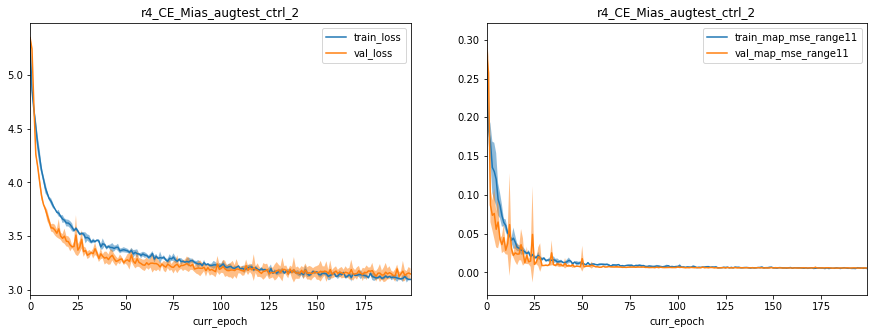

------------------------------------------------------------------
peak train_loss: 3.1430 in epoch: 195
peak val_loss: 3.0703 in epoch: 192
peak train_map_mse_range11: 0.0068 in epoch: 195
peak val_map_mse_range11: 0.0054 in epoch: 198


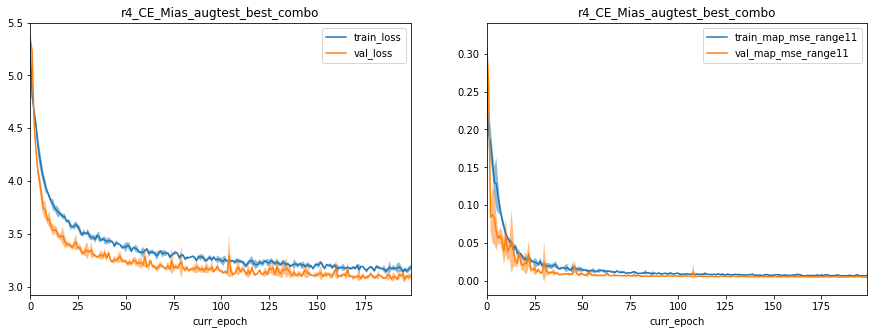

------------------------------------------------------------------


In [120]:
experiment_names = ["r4_CE_Mias_augtest_ctrl_2",
                    
                    "r4_CE_Mias_augtest_best_combo"]


sort_column = "val_mean_aucroc"
variables_to_show = [["loss", "map_mse_range11"]] * len(experiment_names)

ns = [3] * len(experiment_names)


show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

In [121]:
experiment_names = ["r4_CE_Mias_augtest_ctrl_2",
                    
                    "r4_CE_Mias_augtest_best_combo"]

sort_column = "val_loss"
variables_to_show = ["val_loss", "val_map_mse_range11"]

ns = [3] * len(experiment_names)

df = print_table_peak_values(experiment_names, ns, variables_to_show, sort_column)

['experiment', 'val_loss', 'val_loss_sd', 'val_map_mse_range11', 'val_map_mse_range11_sd']


experiment val_loss val_loss_sd val_map_mse_range11  \
0  r4_CE_Mias_augtest_best_combo   3.0703   0.0132237          0.00537713   
0      r4_CE_Mias_augtest_ctrl_2  3.12711   0.0425989          0.00543205   

  val_map_mse_range11_sd  
0            0.000182128  
0             0.00033335

conclusion: keep best aug combo.
This approach probably makes sense to generalise better, even if e.g. shear6 alone has a better loss, since the other ones have a multiple testing problem.

### bottleneck size

peak train_loss: 3.1498 in epoch: 194
peak val_loss: 3.0744 in epoch: 187
peak train_map_mse_range11: 0.0071 in epoch: 199
peak val_map_mse_range11: 0.0054 in epoch: 163


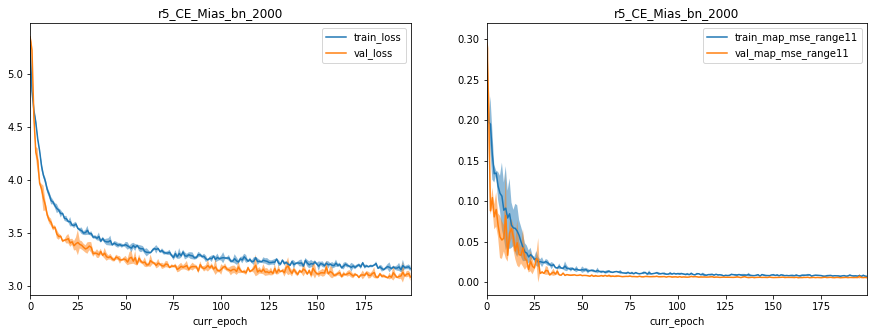

------------------------------------------------------------------
peak train_loss: 3.1430 in epoch: 195
peak val_loss: 3.0703 in epoch: 192
peak train_map_mse_range11: 0.0068 in epoch: 195
peak val_map_mse_range11: 0.0054 in epoch: 198


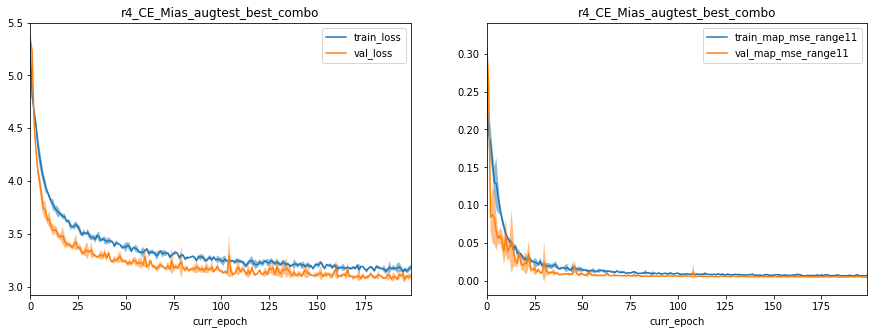

------------------------------------------------------------------
peak train_loss: 3.1405 in epoch: 186
peak val_loss: 3.0740 in epoch: 199
peak train_map_mse_range11: 0.0067 in epoch: 171
peak val_map_mse_range11: 0.0054 in epoch: 199


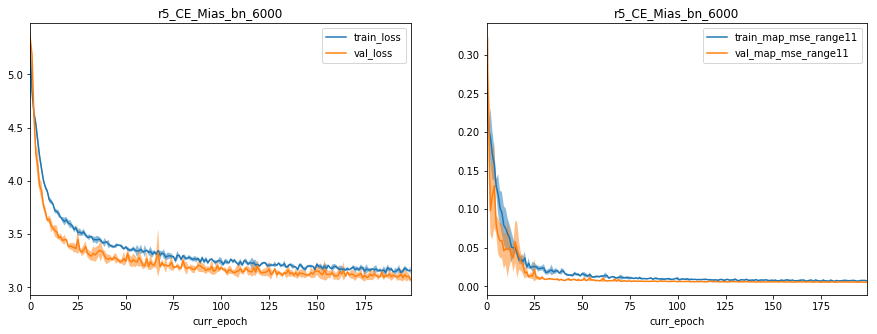

------------------------------------------------------------------
peak train_loss: 3.1326 in epoch: 189
peak val_loss: 3.1374 in epoch: 197
peak train_map_mse_range11: 0.0069 in epoch: 176
peak val_map_mse_range11: 0.0056 in epoch: 196


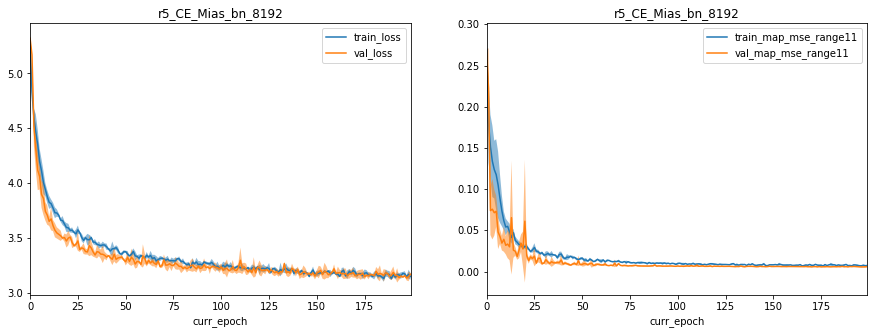

------------------------------------------------------------------


In [124]:
experiment_names = [
"r5_CE_Mias_bn_2000",
"r4_CE_Mias_augtest_best_combo",
"r5_CE_Mias_bn_6000",
"r5_CE_Mias_bn_8192",]


sort_column = "val_mean_aucroc"
variables_to_show = [["loss", "map_mse_range11"]] * len(experiment_names)

ns = [3] * len(experiment_names)


show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

In [125]:
experiment_names = [
"r5_CE_Mias_bn_2000",
"r4_CE_Mias_augtest_best_combo",
"r5_CE_Mias_bn_6000",
"r5_CE_Mias_bn_8192",]


sort_column = "val_loss"
variables_to_show = ["val_loss", "val_map_mse_range11"]

ns = [3] * len(experiment_names)

df = print_table_peak_values(experiment_names, ns, variables_to_show, sort_column)

['experiment', 'val_loss', 'val_loss_sd', 'val_map_mse_range11', 'val_map_mse_range11_sd']


experiment val_loss val_loss_sd val_map_mse_range11  \
0  r4_CE_Mias_augtest_best_combo   3.0703   0.0132237          0.00537713   
0             r5_CE_Mias_bn_6000  3.07402   0.0278081          0.00540941   
0             r5_CE_Mias_bn_2000  3.07445  0.00644701          0.00537316   
0             r5_CE_Mias_bn_8192   3.1374   0.0225009           0.0056119   

  val_map_mse_range11_sd  
0            0.000182128  
0            0.000344804  
0            0.000326473  
0             0.00030291

Conclusion: This looks pretty arbitrary, the differences are smaller than the error bars for sure.
Maybe 4000 is the best because the augmentation was optimised for this setting.
Either way: let's keep 4000!

### padding

peak train_loss: 3.1430 in epoch: 195
peak val_loss: 3.0703 in epoch: 192
peak train_map_mse_range11: 0.0068 in epoch: 195
peak val_map_mse_range11: 0.0054 in epoch: 198


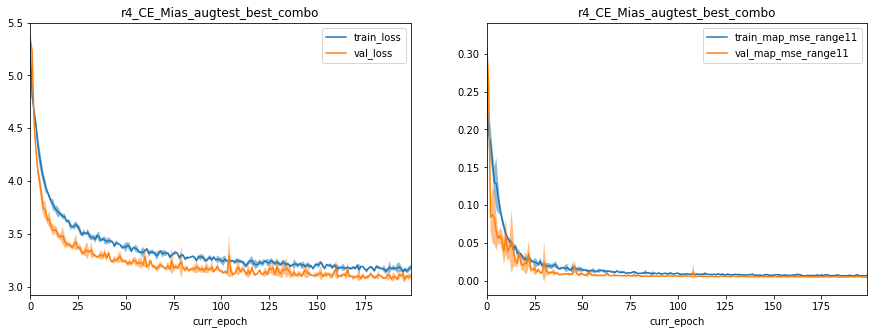

------------------------------------------------------------------
peak train_loss: 2.8318 in epoch: 199
peak val_loss: 3.0919 in epoch: 191
peak train_map_mse_range11: 0.0141 in epoch: 188
peak val_map_mse_range11: 0.0056 in epoch: 194


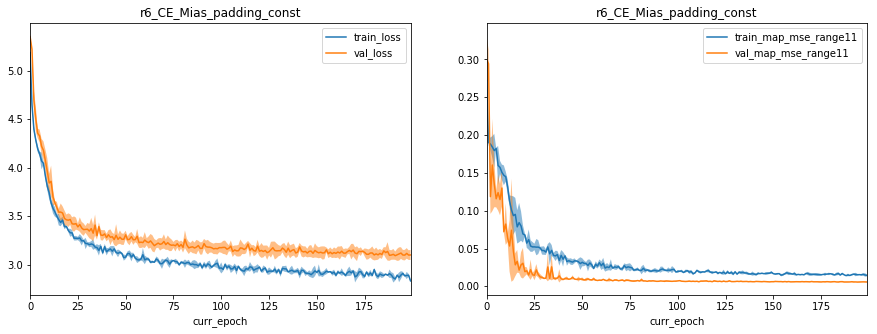

------------------------------------------------------------------
peak train_loss: 2.8664 in epoch: 186
peak val_loss: 3.1259 in epoch: 197
peak train_map_mse_range11: 0.0138 in epoch: 193
peak val_map_mse_range11: 0.0057 in epoch: 194


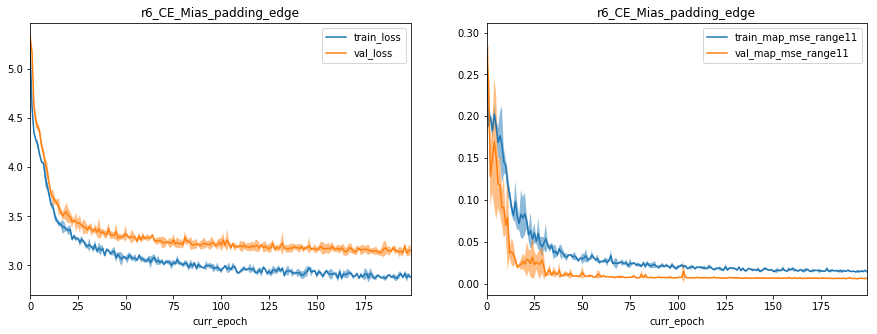

------------------------------------------------------------------


In [126]:
experiment_names = ["r4_CE_Mias_augtest_best_combo",
                    "r6_CE_Mias_padding_const",
                    "r6_CE_Mias_padding_edge"]



sort_column = "val_mean_aucroc"
variables_to_show = [["loss", "map_mse_range11"]] * len(experiment_names)

ns = [3] * len(experiment_names)


show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

In [127]:
experiment_names = ["r4_CE_Mias_augtest_best_combo",
                    "r6_CE_Mias_padding_const",
                    "r6_CE_Mias_padding_edge"]

sort_column = "val_loss"
variables_to_show = ["val_loss", "val_map_mse_range11"]

ns = [3] * len(experiment_names)

df = print_table_peak_values(experiment_names, ns, variables_to_show, sort_column)

['experiment', 'val_loss', 'val_loss_sd', 'val_map_mse_range11', 'val_map_mse_range11_sd']


experiment val_loss val_loss_sd val_map_mse_range11  \
0  r4_CE_Mias_augtest_best_combo   3.0703   0.0132237          0.00537713   
0       r6_CE_Mias_padding_const  3.09192   0.0424013          0.00564637   
0        r6_CE_Mias_padding_edge   3.1259   0.0347494          0.00572458   

  val_map_mse_range11_sd  
0            0.000182128  
0             0.00027993  
0            0.000490123

Conclusion:
* just as I expected, train set does become easier! (see training over time traces)
* the difference in performance on the val set between constant padding and no padding is super small. I'll go with padding.

Let's look at some images as well....

### which model to use for visualisation?

Use the best model run for visualisation:

peak train_loss: 3.1128 in epoch: 172
peak val_loss: 3.0496 in epoch: 196
peak train_map_mse_range11: 0.0063 in epoch: 148
peak val_map_mse_range11: 0.0051 in epoch: 185


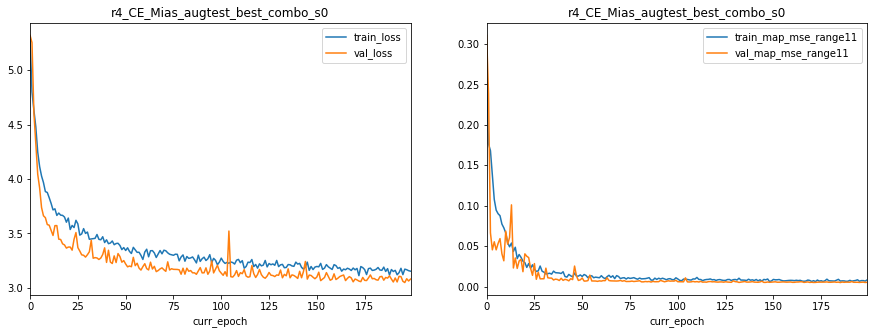

------------------------------------------------------------------
peak train_loss: 3.1163 in epoch: 186
peak val_loss: 3.0748 in epoch: 186
peak train_map_mse_range11: 0.0067 in epoch: 192
peak val_map_mse_range11: 0.0054 in epoch: 197


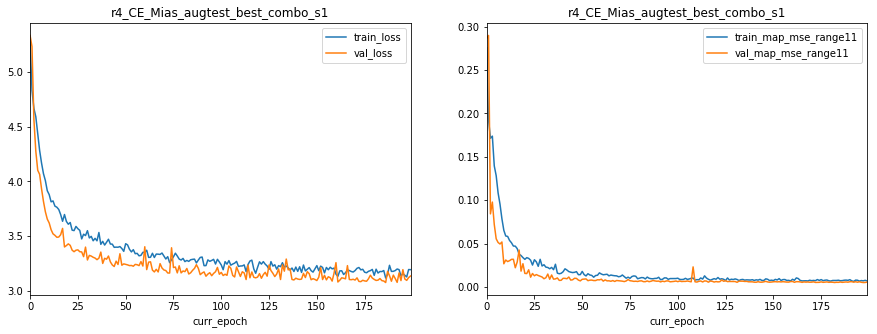

------------------------------------------------------------------
peak train_loss: 3.1317 in epoch: 185
peak val_loss: 3.0522 in epoch: 189
peak train_map_mse_range11: 0.0065 in epoch: 174
peak val_map_mse_range11: 0.0054 in epoch: 184


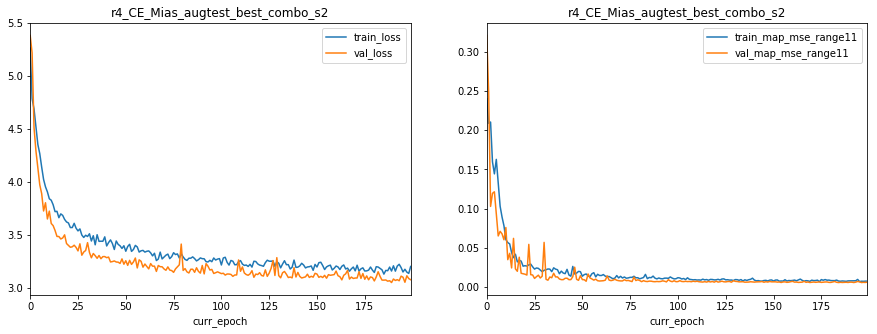

------------------------------------------------------------------
peak train_loss: 2.8086 in epoch: 190
peak val_loss: 3.1409 in epoch: 191
peak train_map_mse_range11: 0.0136 in epoch: 188
peak val_map_mse_range11: 0.0054 in epoch: 192


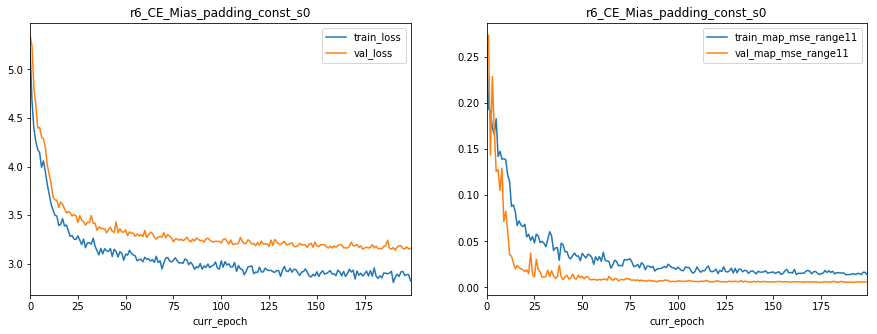

------------------------------------------------------------------
peak train_loss: 2.8166 in epoch: 193
peak val_loss: 3.0449 in epoch: 196
peak train_map_mse_range11: 0.0138 in epoch: 189
peak val_map_mse_range11: 0.0053 in epoch: 184


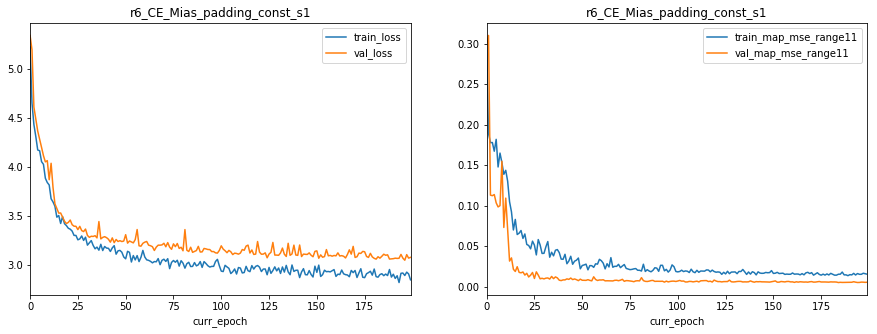

------------------------------------------------------------------
peak train_loss: 2.8249 in epoch: 199
peak val_loss: 3.0574 in epoch: 171
peak train_map_mse_range11: 0.0123 in epoch: 198
peak val_map_mse_range11: 0.0053 in epoch: 157


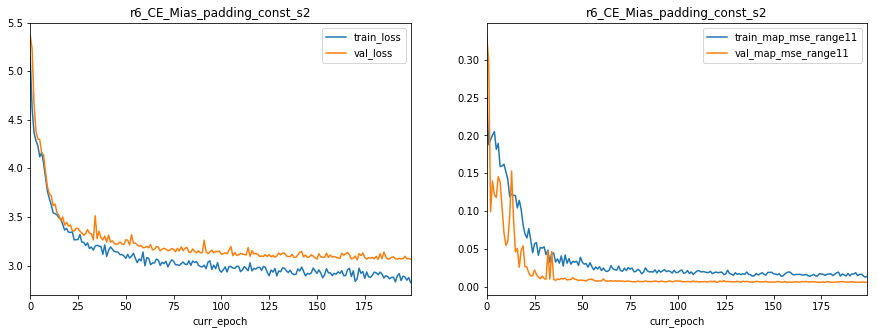

------------------------------------------------------------------


In [130]:
experiment_names = ["r4_CE_Mias_augtest_best_combo_s0",
                    "r4_CE_Mias_augtest_best_combo_s1",
                    "r4_CE_Mias_augtest_best_combo_s2",
                    "r6_CE_Mias_padding_const_s0",
                    "r6_CE_Mias_padding_const_s1",
                    "r6_CE_Mias_padding_const_s2"]

sort_column = "val_mean_aucroc"
variables_to_show = [["loss", "map_mse_range11"]] * len(experiment_names)

ns = [1] * len(experiment_names)


show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

In [133]:
experiment_names = ["r4_CE_Mias_augtest_best_combo_s0",
                    "r4_CE_Mias_augtest_best_combo_s1",
                    "r4_CE_Mias_augtest_best_combo_s2",
                    "r6_CE_Mias_padding_const_s0",
                    "r6_CE_Mias_padding_const_s1",
                    "r6_CE_Mias_padding_const_s2"]

sort_column = "val_loss"
variables_to_show = ["val_loss", "val_map_mse_range11"]

ns = [1] * len(experiment_names)

df = print_table_peak_values(experiment_names, ns, variables_to_show, sort_column)

['experiment', 'val_loss', 'val_loss_sd', 'val_map_mse_range11', 'val_map_mse_range11_sd']


experiment val_loss  val_loss_sd val_map_mse_range11  \
0       r6_CE_Mias_padding_const_s1  3.04494          NaN          0.00529971   
0  r4_CE_Mias_augtest_best_combo_s0  3.04965          NaN           0.0050945   
0  r4_CE_Mias_augtest_best_combo_s2  3.05218          NaN           0.0054051   
0       r6_CE_Mias_padding_const_s2  3.05739          NaN          0.00526666   
0  r4_CE_Mias_augtest_best_combo_s1  3.07484          NaN          0.00537787   
0       r6_CE_Mias_padding_const_s0  3.14085          NaN          0.00537082   

   val_map_mse_range11_sd  
0                     NaN  
0                     NaN  
0                     NaN  
0                     NaN  
0                     NaN  
0                     NaN

conclusion: use the best two models for visualisation. Say so.

but le's also look at test set performance to confirm:

In [148]:
experiment_names = ["r4_CE_Mias_augtest_best_combo_s0",
                    "r4_CE_Mias_augtest_best_combo_s1",
                    "r4_CE_Mias_augtest_best_combo_s2",
                    "r6_CE_Mias_padding_const_s0",
                    "r6_CE_Mias_padding_const_s1",
                    "r6_CE_Mias_padding_const_s2"]

sort_column = "test_loss"
variables_to_show = ["test_loss", "test_map_mse_range11"]

ns = [1] * len(experiment_names)

print_table_test_results(experiment_names, ns, variables_to_show="all", sort_column=sort_column)

test_accuracy  test_loss  test_map_mse_range11  \
0       0.185334   2.929383              0.003790   
0       0.164891   3.066225              0.004618   
0       0.136763   3.084115              0.003757   
0       0.143110   3.096315              0.004715   
0       0.123911   3.183186              0.004365   
0       0.120176   3.227451              0.004855   

                         experiment  
0  r4_CE_Mias_augtest_best_combo_s2  
0  r4_CE_Mias_augtest_best_combo_s1  
0       r6_CE_Mias_padding_const_s2  
0       r6_CE_Mias_padding_const_s0  
0  r4_CE_Mias_augtest_best_combo_s0  
0       r6_CE_Mias_padding_const_s1

Conclusion: I will still take the two best val-set models (for visualisation, and for anomaly detection), since test set is super small.
I have written a bit more about this in the word doc.

Note, however, that in the following, I only train 1 replicate per model setting, so I don't have to choose which run I use for anomaly detection.

## Training

peak train_loss: 0.0050 in epoch: 164
peak val_loss: 0.0033 in epoch: 168


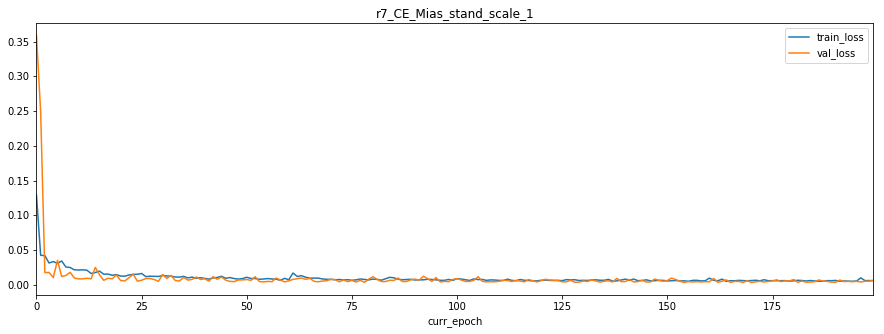

------------------------------------------------------------------
peak train_loss: 0.0057 in epoch: 162
peak val_loss: 0.0061 in epoch: 194


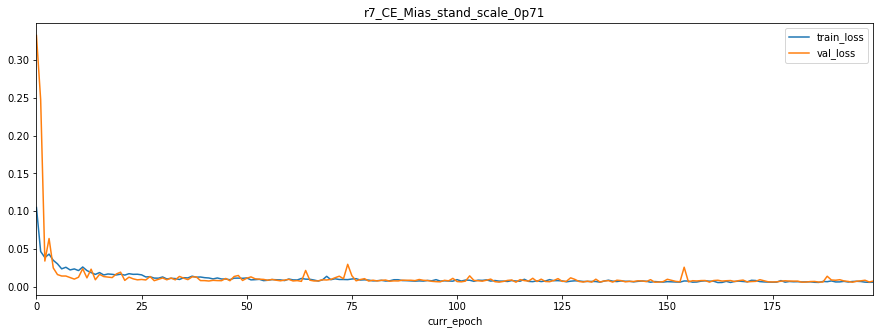

------------------------------------------------------------------
peak train_loss: 0.0072 in epoch: 156
peak val_loss: 0.0060 in epoch: 159


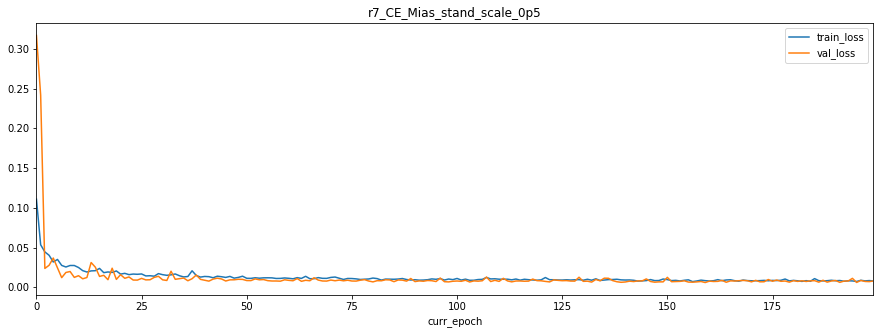

------------------------------------------------------------------
peak train_loss: 0.0094 in epoch: 198
peak val_loss: 0.0078 in epoch: 164


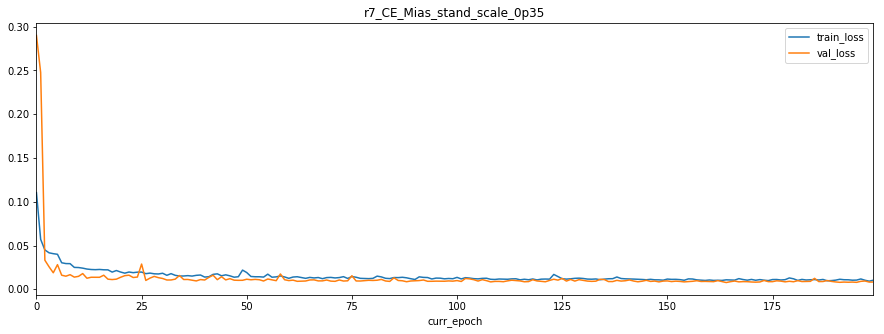

------------------------------------------------------------------
peak train_loss: 0.0131 in epoch: 182
peak val_loss: 0.0110 in epoch: 193


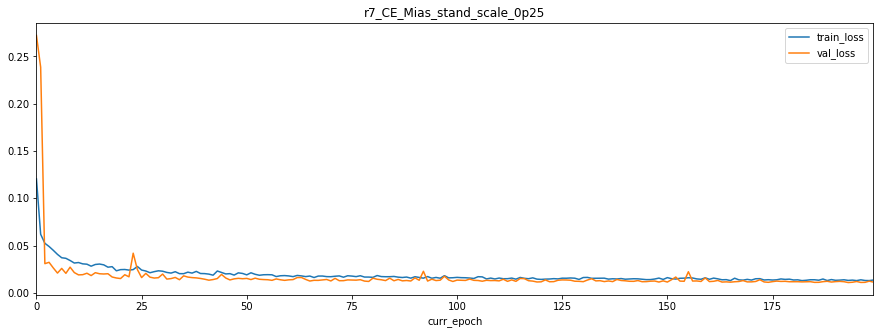

------------------------------------------------------------------
peak train_loss: 0.0183 in epoch: 196
peak val_loss: 0.0154 in epoch: 160


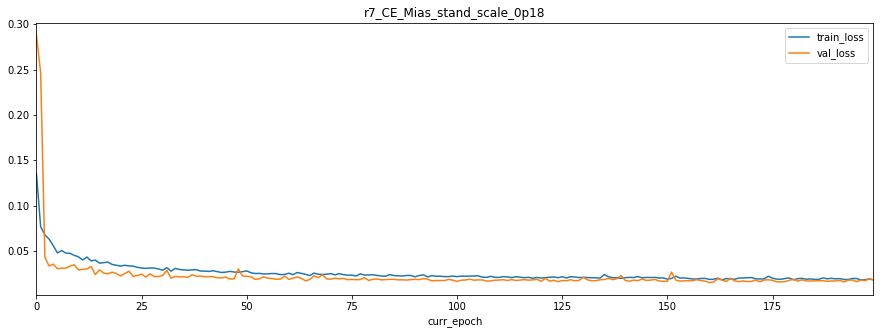

------------------------------------------------------------------
peak train_loss: 0.0243 in epoch: 198
peak val_loss: 0.0231 in epoch: 182


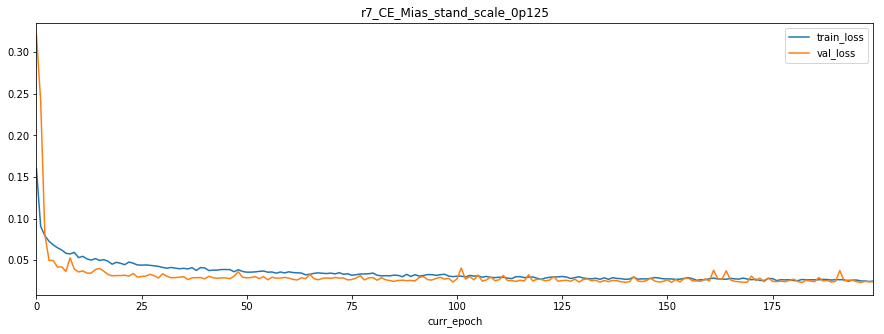

------------------------------------------------------------------
peak train_loss: 0.0048 in epoch: 193
peak val_loss: 0.0035 in epoch: 146


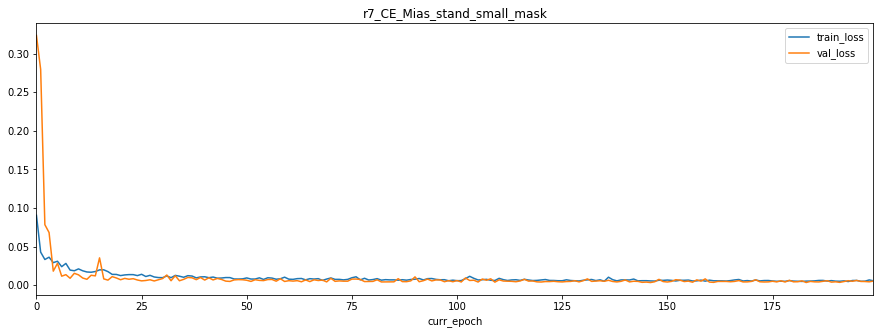

------------------------------------------------------------------


FileNotFoundError: [Errno 2] File b'C:\\Users\\MC JB\\msc_project\\mlp_framework\\results\\r7_CE_Mias_stand_large_contextr7_CE_Mias_prob_scale_1\\result_outputs\\summary.csv' does not exist: b'C:\\Users\\MC JB\\msc_project\\mlp_framework\\results\\r7_CE_Mias_stand_large_contextr7_CE_Mias_prob_scale_1\\result_outputs\\summary.csv'

In [155]:
# just show all experiments
experiment_names = [
                    "r7_CE_Mias_stand_scale_1",
					"r7_CE_Mias_stand_scale_0p71",
					"r7_CE_Mias_stand_scale_0p5",
					"r7_CE_Mias_stand_scale_0p35",
					"r7_CE_Mias_stand_scale_0p25",
					"r7_CE_Mias_stand_scale_0p18",
					"r7_CE_Mias_stand_scale_0p125",
					"r7_CE_Mias_stand_small_mask",
					"r7_CE_Mias_stand_large_context",
                    "r7_CE_Mias_prob_scale_1",
					"r7_CE_Mias_prob_scale_0p71",
					"r7_CE_Mias_prob_scale_0p5",
					"r7_CE_Mias_prob_scale_0p35",
					"r7_CE_Mias_prob_scale_0p25",
					"r7_CE_Mias_prob_scale_0p18",
					"r7_CE_Mias_prob_scale_0p125",
					"r7_CE_Mias_prob_small_mask",
                    "r7_CE_Mias_prob_large_context",
]

ns = [1]*len(experiment_names)

variables_to_show = [["all"]]*(len(experiment_names)//2) + [["loss","map_mse_range11"]]*(len(experiment_names)//2)

show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

# Working Space

In [129]:
experiment_names = ["CE_DTD_random_patch_test_1___AD1", "CE_DTD_random_patch_test_1___AD1"]
sort_column = "val_mean_aucroc"

summary_stats_multi_exp(experiment_names, sort_column)




FileNotFoundError: [Errno 2] File b'C:\\Users\\MC JB\\msc_project\\mlp_framework\\results\\CE_DTD_random_patch_test_1___AD1\\result_outputs\\summary.csv' does not exist: b'C:\\Users\\MC JB\\msc_project\\mlp_framework\\results\\CE_DTD_random_patch_test_1___AD1\\result_outputs\\summary.csv'

In [5]:
experiment_name = "CE_cpu_dev_test_seeds"
sort_column = "val_mean_aucroc"

n = 2
results_base_dir = "C:\\Users\\MC JB\\msc_project\\mlp_framework\\results"

df = load_summary_file(experiment_name, n, results_base_dir)

In [30]:
sd = df.groupby(df.index).std().loc[:,"val_loss"]
sd

curr_epoch
0    0.0
1    0.0
Name: val_loss, dtype: float64

peak train_loss: 0.3918 in epoch: 1
peak val_loss: 0.3814 in epoch: 1


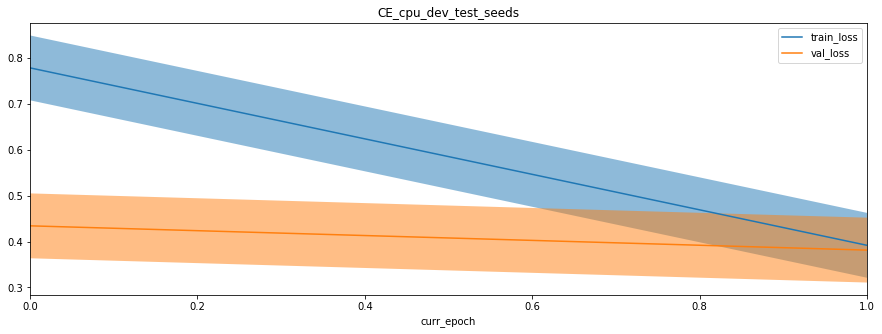

In [33]:
experiment_name = "CE_cpu_dev_test_seeds"
sort_column = "val_mean_aucroc"
variables_to_show = "all"

n = 2
results_base_dir = "C:\\Users\\MC JB\\msc_project\\mlp_framework\\results"

show_traces(experiment_name = experiment_name, n=n, variables_to_show=variables_to_show, logy=False)